In [ ]:
# -*- coding: utf-8 -*-
"""
Title: Supplementary material of article
Author: Marc Jofre

Jofre, M.; Jofre, L.; Jofre-Roca, L. On the Wireless Microwave Sensing of Bacterial Membrane Potential in Microfluidic-Actuated Platforms. Sensors 2021, 21, 3420. https://doi.org/10.3390/s21103420
 
@author: mjofre
"""
import os, sys
import numpy as np
#from scipy.interpolate import interp1d
import pandas as pd
import math
from scipy import fftpack, signal
from scipy.ndimage import uniform_filter1d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.colors as colors
from matplotlib import ticker
import matplotlib.cm as cm
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from PIL import Image, ImageDraw
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab import files
import matplotlib.style
import matplotlib as mpl
#print(plt.style.available)
mpl.style.use('default')
try:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True) 
  !pip install import-ipynb
  import import_ipynb
  # in order to have access to folders in the directory Shared with me: Go to the folder of interest and right-click in order to add a shortcut to My Drive
  sys.path.append('/content/drive/My Drive/BioMicroFluidicsWirelessMonitoring/Calculations/PythonCalculations/')
  #!cp -r "/content/drive/My Drive/BioMicroFluidicsWirelessMonitoring/Calculations/PythonCalculations/LibsDetectPeaks.ipynb" '/content/'
except:
  print('Google drive paths not loaded')

#import LibsDetectPeaks
########## PARULA COLORMAP ##########
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]
 
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
########## PARULA COLORMAP ###########
#my_cmap = cm.get_cmap( 'gray' )
my_cmap = parula_map
########################### General parameters #################################
### Self-defined functions
def FindNearestIndex(Array,value):
  return np.argmin(np.abs(Array-value))
###############################################################################
NpointsCalcs=45
AddingNLliquid=False # Like DMSO, or other alcohols with microwave second order non-linear coefficients
ParticleDiameter=1e-6 # Can be other argonisms different from bacteria
MembraneThickness=1e-9
Nbacteria=1e0 # bacteria simulatenously
c_0=3e8
FreqTx=np.logspace(8,11,NpointsCalcs)#3e9 # [Hz]
freqIll=1e9 # [Hz]
PlanckConstant=6.62607015e-34
BoltzmanConstant=1.38064852e-23
Permetivity_0=8.854e-12
Permeability_0=4.0*np.pi*1e-7
TimeDurationMP=500e-3 # [s]
AverageTime=60.0*6 #seconds
IlluminationDutyCycle=1.0
RepetitionFrequency=0.1 # [Hz]
ExteriorIllumination=0 # 1: Electrodes antenna in the exterior; 0: Electrodes antenna in the interior of the microfluidic channel
CalculatePIMPS=True
CalculateMatchedFilter=True
NumCycles=2048#65536#8192#4096
CyclesSamplingFactor=16.0
################################
FoVdiameterIllumination=(10e-6)**2
if (ExteriorIllumination==1):
  ThiknessPMMA=175e-6
  ThicknessWater=25e-6
  MeasuringDistance=ThiknessPMMA+ThicknessWater
else:
  MeasuringDistance=25e-6 # Thickness of the channel is 2.0*MeasuringDistance

Mounted at /content/gdrive
Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.9 MB/s eta 0:00:00
importing Jupyter notebook from LibsDetectPeaks.ipynb


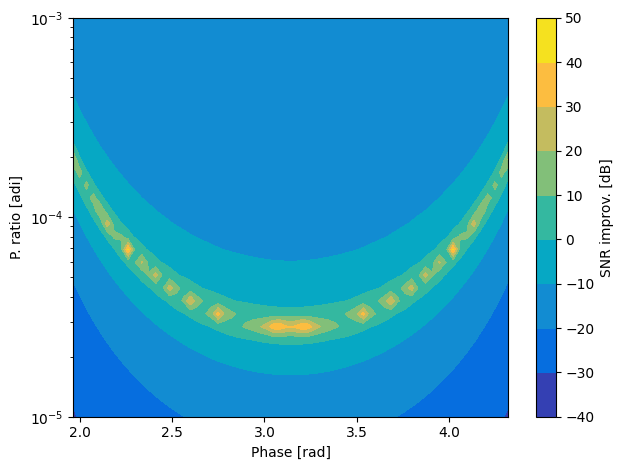

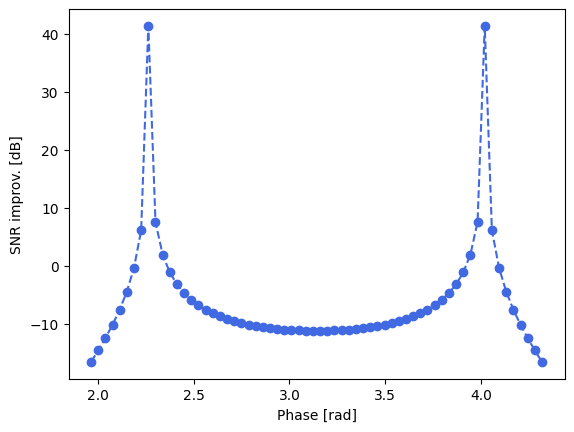

In [ ]:
## Given a non-linear quadripole represented with the following input-output relation: y(t)=a*x(t)+b*x^2(t)-c*x^3(t), where the input signal is of the form x(t)=I_1*cos(w_1*t)+I_2*cos(w_2*t)
# The more dangerous intermodulation products are of the third order of the form 2*f_1+f_2 or 2*f_2-f_1.
# https://ieeexplore-ieee-org.recursos.biblioteca.upc.edu/stamp/stamp.jsp?tp=&arnumber=925508
NpointsCalcsPinput=32
NpointsCalcsPhase=64
Pinput1=1e-4 # [W]
Impedance=50.0 # [Ohm]
I1=np.sqrt(Pinput1*Impedance) # Amplitude
PinputRatio=np.logspace(-5,-3,NpointsCalcsPinput)
PhaseScan=np.linspace(np.pi/2.0+np.pi/8.0,3.0*np.pi/2.0-np.pi/8.0,NpointsCalcsPhase)#,endpoint=False)
SNRarray=np.zeros((int(len(PhaseScan)),int(len(PinputRatio))),dtype=np.float32)
for iIterPinputRatio in range(0,len(PinputRatio),1):
  for iIterPhase in range(0,len(PhaseScan),1):
    # a*P+b*P**2+cP**3 # Nonlinear particle and equipment model
    # Freq. of interest 2*f1-f2
    a=1e0
    b=1e-4#SecondOrderNonlinearityCoeff[FreqAnalysisIndex1]
    c=1e-8#ThirdOrderNonlinearityCoeff[FreqAnalysisIndex1]
    
    #But due to the non-linearity of the detection system, it might impose limits
    # Detection system
    a_s=1e0
    b_s=1e-3
    c_s=1e-4

    I2=np.sqrt(Pinput1*Impedance*PinputRatio[iIterPinputRatio])
    
    Total_SNRs=0.75*(I1**3)*c+I1*I2*b*np.cos(PhaseScan[iIterPhase])
    Total_SNRn=0.75*(I1**3)*c_s+I1*I2*b_s*np.cos(PhaseScan[iIterPhase])
    
    SNRarray[iIterPhase,iIterPinputRatio]=20.0*np.log10(np.abs(Total_SNRs))-20.0*np.log10(np.abs(Total_SNRn))

# Plotting
fig1=plt.figure()
ax = plt.gca()
cont=plt.contourf(PhaseScan, PinputRatio, SNRarray.T, cmap=my_cmap)
cbar=plt.colorbar()
cbar.set_label('SNR improv. [dB]', rotation=90)
#cbar=fig1.colorbar(strm.lines,fraction=0.046, pad=0.04)
#cbar.set_label('$\mathrm{20 \log_{10} \Delta B}$', rotation=90, labelpad=8)
#cbar.mappable.set_clim(20.0*np.log10(BminAver),20.0*np.log10(BtotalMax))
#cbar.draw_all()
#plt.ylabel('z-axis [$\mathrm{mm}$]')
plt.ylabel('P. ratio [adi]')
plt.xlabel('Phase [rad]')
plt.yscale('log')
#plt.xlim([Freq2Ratio[0], Freq2Ratio[-1]])
#plt.ylim([PinputAux[0], PinputAux[-1]])
plt.tight_layout()
#plt.margins(0, 0)
#plt.savefig('FigTheoreticalSNRpimpsAnalysis.eps', format = 'eps', dpi = 600 )
plt.show()

def ReturnMaxIndex2Darray(Func2Dmap):
  try:
    #[MaxIndexResultsX,MaxIndexResultsY]=np.where(Func2Dmap==np.amax(Func2Dmap))
    #print(np.unravel_index(np.argmax(Func2Dmap), Func2Dmap.shape))
    [MoreMaxX,MoreMaxY]=np.unravel_index(np.argmax(Func2Dmap), Func2Dmap.shape)
  except:
    print('No maximum identified!')
    MoreMaxX=0
    MoreMaxY=0
  return MoreMaxX,MoreMaxY

[MaxIndexPhase,MaxIndexP]=ReturnMaxIndex2Darray(SNRarray[0:int(len(PhaseScan)/2),:])

plt.figure()
line1,=plt.plot(PhaseScan,SNRarray[:,MaxIndexP],'royalblue',linestyle='dashed',marker='o')
#line2,=plt.plot(XpartPosScan*1e3,dBSNRnomag,'firebrick',linestyle='dashed',marker='*')
#plt.xlim(XpartPosScan[0]*1e3,XpartPosScan[-1]*1e3)
#plt.ylim(np.max([1e2,KeyBitRateLowerBondDiscretePhase[-1],PrecisionElementsKeyBitRateLowerBondDiscretePhase[-1]]),SourcePulseRate)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim([Freq2Ratio[0],Freq2Ratio[-1]])
plt.xlabel('Phase [rad]',color='k')
plt.ylabel('SNR improv. [dB]',color='k')
#plt.savefig(pathScriptData+'FigTheoreticalSNRcomparisonBR2ConeSuperanalysis.png', format = 'eps', dpi = 600 )
plt.show()


10*np.log10(RoomEquivalentNoise*1e3): -163.97940008672037
10*np.log10(EquivalentNoise*1e3): -182.57856876981774
Bacteria is dielectric at 10 GHz


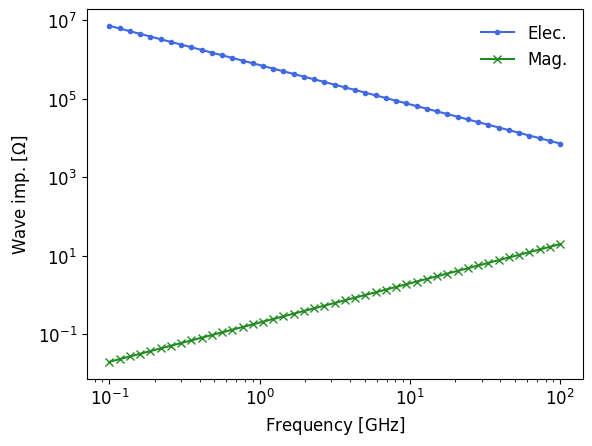

Applied voltage: 0.07107621739781139
Applied E. field: 1421.5243479562278 [V/m]
TxPowerNonFocused: 1.0000000000000002e-08
EfieldTypicallyApplied: 1421.5243479562278 [V/m]
PowerIrradiationInterestDensity: 100.0 [$W/m^2$]. Theoretically the limit for non-thermal is 100 [$W/m^2$]
Power radiated: 1.0000000000000002e-08 [$W$].


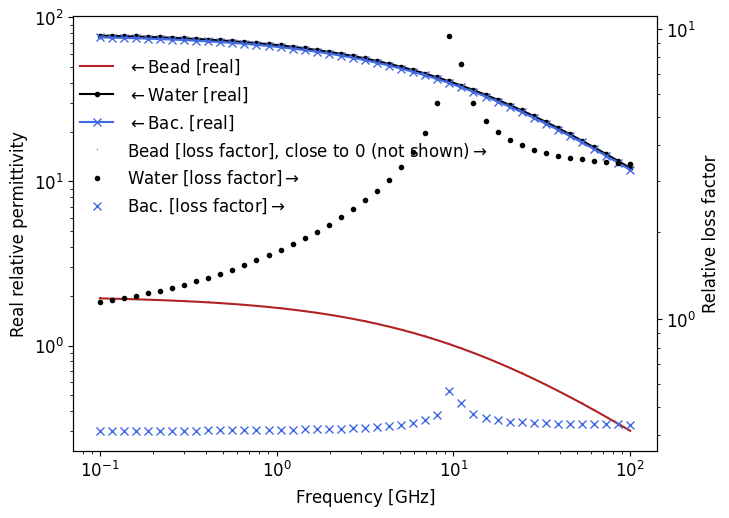

In [ ]:
######################## Power and Noise levels #############################
# Without going into the derivation or rationale, the definition begins with the input noise level
# (which is usually due to thermal noise from the source and is referred to by kT0B),
# using a reference source temperature of 290 K denoted by T0, (equivalent to 16.8°C and 62.3°F).
# The quantity kT0 is called power spectral density band equals 4.00 × 10-21 watts per hertz of bandwidth (–174 dBm/Hz).
# Suppose detection bandwidth of 1GHz
RoomTemperatureNoisePowerSpectralDensity=4e-21 # [W/Hz]
DetectionBandwidth=1e1 # [Hz]
RoomEquivalentNoise=RoomTemperatureNoisePowerSpectralDensity*DetectionBandwidth
print('10*np.log10(RoomEquivalentNoise*1e3): '+str(10*np.log10(RoomEquivalentNoise*1e3)))
TemperatureC=-273.15+4.0 # [Cº] # Cryogenic values
TemperatureK=TemperatureC+273.15 # [K]
EquivalentNoise=BoltzmanConstant*TemperatureK*DetectionBandwidth
print('10*np.log10(EquivalentNoise*1e3): '+str(10*np.log10(EquivalentNoise*1e3)))
#############################################
# Permitivity decay analysis.
# When the permittivity of the host liquid (water e_r=78-j12 @ 2.45GHz) is much greater than that of the microsphere (e_r=2.0)
FreqPointPermChange=1e10
# [Asami_1980,Tuca_2016] and congruent with [Li_2018,Haandbaek_2014]
PermettivityOnlyCellTxAtLowGHz=78.0
PermettivityOnlyCellSynapseTxAtLowGHz=PermettivityOnlyCellTxAtLowGHz*(1.00)# Assumed no variation
PermettivityOnlyWaterTxAtLowGHz=80.0
PermittivityPMMAAtLowGHz=2.6
PermettivityOnlyBeadTxAtLowGHz=2.0
# A. A. Abduljabar, et al., “Modelling and Measurements of the Microwave Dielectric Properties of Microspheres”, IEEE Trans. Microwave Theor. and Techniques, 62, 4492-4500 (2015).
PermettivityOnlyCellTx=PermettivityOnlyCellTxAtLowGHz*(1.0/((1+(FreqTx/FreqPointPermChange)**0.75)**(1)))-1j*1.0*(1.0*(0.17+0.017*np.abs(FreqTx/(FreqPointPermChange-FreqTx))**0.75)**(1/2))#+1j*0.17*(1.0*(1+1.0*np.abs(FreqTx/(FreqPointPermChange-0.0))**1.0)**(0.25))#-1j*1.0*(1.0*(0.17+0.017*np.abs(FreqTx/(FreqPointPermChange-FreqTx))**1)**(1/2))# Check permitivity decay to adjust better
PermettivityOnlyCellSynapseTx=PermettivityOnlyCellSynapseTxAtLowGHz*(1.0/((1+(FreqTx/FreqPointPermChange)**0.75)**(1)))-1j*1.0*(1.0*(0.17+0.017*np.abs(FreqTx/(FreqPointPermChange-FreqTx))**0.75)**(1/2))#+1j*0.17*(1.0*(1+1.0*np.abs(FreqTx/(FreqPointPermChange-0.0))**1.0)**(0.25))#-1j*1.0*(1.0*(0.17+0.017*np.abs(FreqTx/(FreqPointPermChange-FreqTx))**1)**(1/2))# Check permitivity decay to adjust better
PermettivityOnlyBeadTx=PermettivityOnlyBeadTxAtLowGHz*(1.0/((1+(FreqTx/FreqPointPermChange)**0.75)**(1)))-1j*0.0*(2.0*(1+1.0*np.abs(FreqTx/(FreqPointPermChange-0.0))**0.75)**(1/2))
PermettivityOnlyWaterTx=PermettivityOnlyWaterTxAtLowGHz*(1.0/((1+(FreqTx/FreqPointPermChange)**0.75)**(1)))-1j*1.0*(1.0*(1.0+10.0*np.abs(FreqTx/(FreqPointPermChange-FreqTx))**0.75)**(1/2))#-1j*12.0*(2.0*(1+1.0*np.abs(FreqTx/(FreqPointPermChange-0.0))**1)**(1/2))
PermettivityPMMATx=PermittivityPMMAAtLowGHz*(1.0/((1+(FreqTx/FreqPointPermChange)**0.75)**(1)))-1j*0.5*(2.0*(1+1.0*np.abs(FreqTx/(FreqPointPermChange-0.0))**0.75)**(1/2))
#Effective Permittivity PMMA and water (condensators in series as described in Circuitos de microondas con líneas de transmisión Javier Bará Edicions UPC)
 
if (ExteriorIllumination==1):
  # https://arxiv.org/pdf/1705.02248.pdf
  #VolumeFractionApprox=(0.5*ParticleDiameter/ThicknessWater)**3
  PermettivityWaterTxAtLowGHz=((ThiknessPMMA*(PermittivityPMMAAtLowGHz)+ThicknessWater*(PermettivityOnlyWaterTxAtLowGHz))/(ThiknessPMMA+ThicknessWater))
  PermettivityWaterTx=((ThiknessPMMA*(PermettivityPMMATx)+ThicknessWater*(PermettivityOnlyWaterTx))/(ThiknessPMMA+ThicknessWater))
  PermettivityWaterTxAtLowGHz=PermettivityOnlyWaterTxAtLowGHz
  PermettivityWaterTx=PermettivityOnlyWaterTx
  PermettivityCellTxAtLowGHz=PermettivityOnlyCellTxAtLowGHz
  PermettivityCellTx=PermettivityOnlyCellTx
  PermettivityCellSynapseTxAtLowGHz=PermettivityOnlyCellSynapseTxAtLowGHz
  PermettivityCellSynapseTx=PermettivityOnlyCellSynapseTx
  PermettivityBeadTxAtLowGHz=PermettivityOnlyBeadTxAtLowGHz
  PermettivityBeadTx=PermettivityOnlyBeadTx
else: # Internal illumination (electrodes/antenna inside the microchannel)
  PermettivityWaterTxAtLowGHz=PermettivityOnlyWaterTxAtLowGHz
  PermettivityWaterTx=PermettivityOnlyWaterTx
  PermettivityCellTxAtLowGHz=PermettivityOnlyCellTxAtLowGHz
  PermettivityCellTx=PermettivityOnlyCellTx
  PermettivityCellSynapseTxAtLowGHz=PermettivityOnlyCellSynapseTxAtLowGHz
  PermettivityCellSynapseTx=PermettivityOnlyCellSynapseTx
  PermettivityBeadTxAtLowGHz=PermettivityOnlyBeadTxAtLowGHz
  PermettivityBeadTx=PermettivityOnlyBeadTx
 
#Bacteria, dielectric or conductor?
FreqBacteriaAnalysis=10e9
indexFreqAnalysis=FindNearestIndex(FreqTx,FreqBacteriaAnalysis)
# If \sigma/(\omega \epsilon)>>1 then conduction currents dominate and the medium is a conductor. If \sigma/(\omega \epsilon)<<1 then displacement currents dominate and the material behaves as a dielectric. When \sigma/(\omega \epsilon)\approx 1 the material is a quasi-conductor
#print(np.abs(np.imag(PermettivityCellSynapseTx[indexFreqAnalysis]))/(2.0*np.pi*FreqBacteriaAnalysis*np.abs(np.real(PermettivityCellSynapseTx[indexFreqAnalysis]))))
if ((np.abs(np.imag(PermettivityCellSynapseTx[indexFreqAnalysis]))/(2.0*np.pi*FreqBacteriaAnalysis*np.abs(np.real(PermettivityCellSynapseTx[indexFreqAnalysis]))))>10.0):
  print('Bacteria is conductor at '+str(int(FreqBacteriaAnalysis*1e-9))+' GHz')
elif ((np.abs(np.imag(PermettivityCellSynapseTx[indexFreqAnalysis]))/(2.0*np.pi*FreqBacteriaAnalysis*np.abs(np.real(PermettivityCellSynapseTx[indexFreqAnalysis]))))<0.1):
  print('Bacteria is dielectric at '+str(int(FreqBacteriaAnalysis*1e-9))+' GHz')
else:
  print('Bacteria is quasi-conductor at '+str(int(FreqBacteriaAnalysis*1e-9))+' GHz')
Rbacteria=1e1
# https://en.wikipedia.org/wiki/Wave_impedance
# https://en.wikipedia.org/wiki/Near_and_far_field
WaveImpedance_0AtLowGHz=((60.0*(c_0/FreqBacteriaAnalysis)/MeasuringDistance))
WaveImpedance_0=((60.0*(c_0/FreqTx)/MeasuringDistance))
ResistanceBacteriaAtLowGHz=Rbacteria #https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1327234/pdf/biophysj00251-0046.pdf 1.0/0.17 #inverse of conductivity. Here there might be an issue of conceptuality since the inverse of the conductance is the resistivity which is in terms of longitude (not the resistance). Then solved by multiplying when needed by also the dimension of the particle
ResistanceBacteria=ResistanceBacteriaAtLowGHz*np.ones_like(PermettivityCellTx)#1.0/np.abs(np.imag(PermettivityCellTx))
WaveImpedanceMediumRAtLowGHz=WaveImpedance_0AtLowGHz#/np.sqrt(np.real(PermettivityWaterTxAtLowGHz))
WaveImpedanceMediumR=WaveImpedance_0#/np.sqrt(np.real(PermettivityWaterTx))  
 
WaveImpedanceEdet_0AtLowGHz=(60.0*(c_0/FreqBacteriaAnalysis)/MeasuringDistance)
WaveImpedanceEdet_0=(60.0*(c_0/FreqTx)/MeasuringDistance)
WaveImpedanceBac_0AtLowGHz=(2370.0*MeasuringDistance/(c_0/FreqBacteriaAnalysis))
WaveImpedanceBac_0=(2370.0*MeasuringDistance/(c_0/FreqTx))
 
DefaultFigSize=[6.4, 4.8]
plt.figure()#figsize=(DefaultFigSize[0]/.85,DefaultFigSize[1]/.85))
line1,=plt.plot(FreqTx*1e-9,WaveImpedanceEdet_0,'royalblue',marker='.')
line2,=plt.plot(FreqTx*1e-9,WaveImpedanceBac_0,'forestgreen',marker='x')
#line3,=plt.plot(FreqTx*1e-9,np.real(PermettivityCellSynapseTx),'forestgreen',marker='+')
#line3,=plt.plot(FreqTx*1e-9,np.real(PermettivityBeadTx),'firebrick',marker=',')
plt.xlabel('Frequency [$\mathrm{GHz}$]',fontsize='large')
plt.ylabel('Wave imp. [$\mathrm{\Omega}$]',fontsize='large')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.legend((line1,line2), ('Elec.', 'Mag.'),loc='best', fontsize = 'large',shadow = False, fancybox = False, frameon = False)# 'best'
plt.show()
 
RefractiveIndexMedium=1.0#np.sqrt(np.real(PermettivityWaterTx))
WaveImpedanceMediumAtLowGHz=WaveImpedance_0AtLowGHz#/np.sqrt(np.real(PermettivityWaterTxAtLowGHz))
WaveImpedanceMedium=WaveImpedance_0#/np.sqrt(np.real(PermettivityWaterTx))
WaveLengthTx=c_0/(RefractiveIndexMedium*FreqTx)
PhotEnergyFreqTx=PlanckConstant*c_0/(WaveLengthTx*RefractiveIndexMedium)

CapPP=PermettivityWaterTx[FindNearestIndex(FreqTx,freqIll)]*Permetivity_0*FoVdiameterIllumination/(2.0*MeasuringDistance)
CapacitorImpedance=np.abs(1.0/(1j*2.0*np.pi*FreqTx[FindNearestIndex(FreqTx,freqIll)]*CapPP))
CircuitImpedance=50.0 # Ohms

PowerAppliedArray=100.0 # Non-thermal regime [W/m] #TxPowerNonFocused/FoVdiameterIllumination

TxPowerNonFocused=PowerAppliedArray*FoVdiameterIllumination #1e-8 # [W] #1e-10; 1e-8; 2.5e-7

AppliedVoltage=np.sqrt(TxPowerNonFocused*CapacitorImpedance)*2.0
AppliedIntensity=TxPowerNonFocused/AppliedVoltage
AppliedEfield=AppliedVoltage/(2.0*MeasuringDistance)
print('Applied voltage: '+str(AppliedVoltage))
print('Applied E. field: '+str(AppliedEfield)+' [V/m]')
TxCircuitPower=TxPowerNonFocused

print('TxPowerNonFocused: '+str(TxPowerNonFocused))
EfieldTypicallyApplied=AppliedVoltage/(MeasuringDistance*2.0)
print('EfieldTypicallyApplied: '+str(EfieldTypicallyApplied)+' [V/m]')
PowerIrradiationInterestDensity=PowerAppliedArray
print('PowerIrradiationInterestDensity: '+str(PowerIrradiationInterestDensity)+' [$W/m^2$]. Theoretically the limit for non-thermal is 100 [$W/m^2$]')
print('Power radiated: '+str(PowerIrradiationInterestDensity*FoVdiameterIllumination)+' [$W$].')

TxPower=PowerAppliedArray*FoVdiameterIllumination

####################################################
# Complex permittivity analysis
DefaultFigSize=[6.4, 4.8]
plt.figure(figsize=(DefaultFigSize[0]/.85,DefaultFigSize[1]/.85))
line1,=plt.plot(FreqTx*1e-9,np.real(PermettivityBeadTx),'firebrick',marker=',')
line2,=plt.plot(FreqTx*1e-9,np.real(PermettivityWaterTx),'black',marker='.')
line3,=plt.plot(FreqTx*1e-9,np.real(PermettivityCellTx),'royalblue',marker='x')
#line3,=plt.plot(FreqTx*1e-9,np.real(PermettivityCellSynapseTx),'forestgreen',marker='+')
plt.xlabel('Frequency [$\mathrm{GHz}$]',fontsize='large')
plt.ylabel('Real relative permittivity',fontsize='large')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.twinx()
line4,=plt.plot(FreqTx*1e-9,np.abs(np.imag(PermettivityBeadTx)),color='firebrick',linestyle='none',marker=',')
line5,=plt.plot(FreqTx*1e-9,np.abs(np.imag(PermettivityWaterTx)),color='black',linestyle='none',marker='.')
line6,=plt.plot(FreqTx*1e-9,np.abs(np.imag(PermettivityCellTx)),color='royalblue',linestyle='none',marker='x')
#line7,=plt.plot(FreqTx*1e-9,np.abs(np.imag(PermettivityCellSynapseTx)),color='forestgreen',linestyle='none',marker='+')
plt.yscale('log')
plt.yticks(fontsize='large')
plt.ylabel('Relative loss factor',fontsize='large')
plt.legend((line1,line2,line3,line4,line5,line6), (r'$\leftarrow$'+'Bead [real]', r'$\leftarrow$'+'Water [real]', r'$\leftarrow$'+'Bac. [real]', 'Bead [loss factor], close to 0 (not shown)'+r'$\rightarrow$', 'Water [loss factor]'+r'$\rightarrow$', 'Bac. [loss factor]'+r'$\rightarrow$'),loc=[0.0,0.525], fontsize = 'large',shadow = False, fancybox = False, frameon = False)# 'best'
plt.savefig( 'FigTheoreticalComplexPerm.png', format = 'png', dpi = 600 )
plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


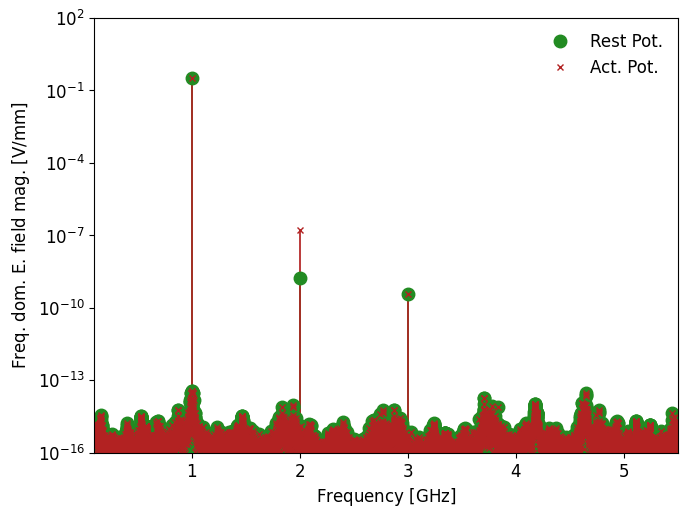

SecondOrderNonlinearityCoeff[freqSHGindex]: 6.49679423622551e-07
SecondOrderNonlinearityCoeff[freqSHGindex]/SecondOrderNonlinearityCoeffRest[freqSHGindex]: 100.00000033677287


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


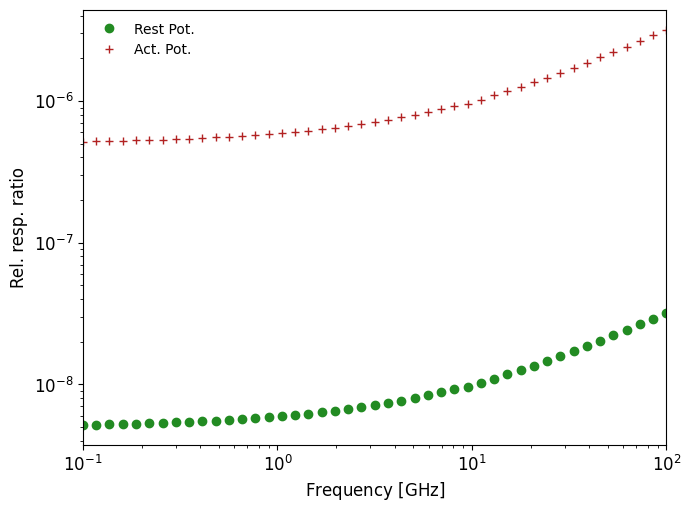

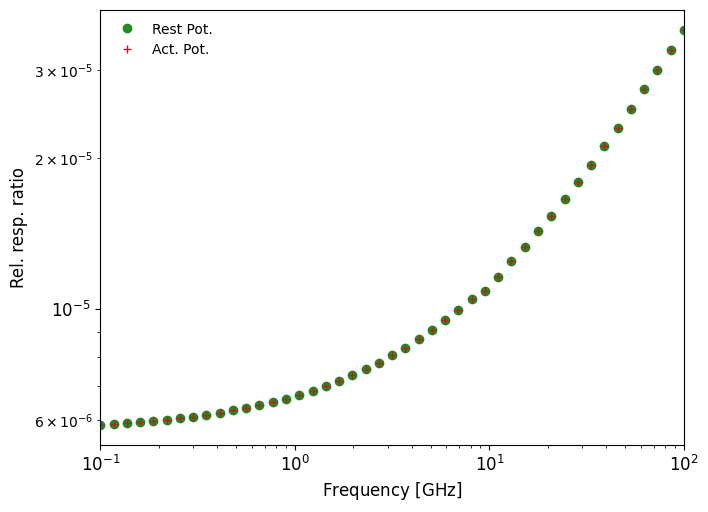

In [ ]:
############################################################################
# Membrane potential second harmonic generation
############################################################################
V_Delta_phi=1e-3*np.linspace(-100.0,200.0,200) # Range of non-linear voltage values difference in the membrane
######### Only valid for small frequencies
V_0=-100e-3 # resting potential [V]
delta_phi=V_Delta_phi-V_0
J_0=1e-5 # A/cm^2
V_T=5e-3 # [V]. Very dependable value for the rest of the calculations
BiasPointPotential=100e-3 # [V] #Very dependable value for the rest of calculations
NoiseVoltage=1e-3#V_T # [V]
BiasPointRestPlot=0.0
BiasPointRest=NoiseVoltage # V

J_m=J_0*(np.exp(delta_phi/V_T)-1.0)
J_mTaylorExpansion0mV=J_0*((np.exp(0.0/V_T)-1.0)+(1.0/math.factorial(1))/(V_T)*delta_phi[int(0*len(delta_phi)/32):int(1*len(delta_phi)/32)]+(1.0/math.factorial(2))/(V_T**2)*delta_phi[int(0*len(delta_phi)/32):int(1*len(delta_phi)/32)]**2+(1.0/math.factorial(3))/(V_T**3)*delta_phi[int(0*len(delta_phi)/32):int(1*len(delta_phi)/32)]**3)
J_mTaylorExpansion100mV=J_0*np.exp(BiasPointPotential/V_T)*(1.0+(1.0/math.factorial(1))/(V_T)*(delta_phi[int(11*len(delta_phi)/32):int(13*len(delta_phi)/32)]-BiasPointPotential)**1+(1.0/math.factorial(2))/(V_T**2)*(delta_phi[int(11*len(delta_phi)/32):int(13*len(delta_phi)/32)]-BiasPointPotential)**2+(1.0/math.factorial(3))/(V_T**3)*(delta_phi[int(11*len(delta_phi)/32):int(13*len(delta_phi)/32)]-BiasPointPotential)**3)

# For microwave frequencies and DMSO susceptibility non-linearity
# Frequency analysis at different points of the voltage current curve
timeDiscretized=np.linspace(0,NumCycles/freqIll,int(NumCycles*CyclesSamplingFactor),endpoint=False) # number of points a power of 2
VoltageNoise=np.random.normal(-NoiseVoltage,NoiseVoltage,len(timeDiscretized))
# P. Mehrotra, "EM-Wave Biosensors: A Review of RF, Microwave,mm-Wave and Optical Sensing", Sensors 2019, 19, 1013; doi:10.3390/s19051013
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1368075/
# https://pubmed.ncbi.nlm.nih.gov/5699794/
# An Original Method for the Measurement of the Radiated Susceptibility of an Electronic System Using Induced Electromagnetic Nonlinear Effects
PermittivityMembraneCellTxAtLowGHz=10.0
# The field of view probably has something to do
Eaux=AppliedVoltage/(2.0*MeasuringDistance)*np.cos(2*np.pi*freqIll*timeDiscretized)
IlluminationSignalRest=((Nbacteria*(ParticleDiameter**3/TotalVolume)*PermittivityMembraneCellTxAtLowGHz*Eaux+(TotalVolume/TotalVolume)*SecondOrderNonlinearCoeff*(Eaux**2)+(Nbacteria*Vshellthickness/TotalVolume)*ThirdOrderNonlinearCoeff*(BiasPointRest/MembraneThickness)*(Eaux**2)+Nbacteria*(ParticleDiameter**3/TotalVolume)*ThirdOrderNonlinearCoeff*(Eaux**3)+Nbacteria*(ParticleDiameter**3/TotalVolume)*FourthOrderNonlinearCoeff*(Eaux**4))-((TotalVolume/TotalVolume)*PermettivityWaterTxAtLowGHz*Eaux))/(PermittivityMembraneCellTxAtLowGHz+2.0*PermettivityWaterTxAtLowGHz)
IlluminationSignalPotential=((Nbacteria*(ParticleDiameter**3/TotalVolume)*PermittivityMembraneCellTxAtLowGHz*Eaux+(TotalVolume/TotalVolume)*SecondOrderNonlinearCoeff*(Eaux**2)+(Nbacteria*Vshellthickness/TotalVolume)*ThirdOrderNonlinearCoeff*(BiasPointPotential/MembraneThickness)*(Eaux**2)+Nbacteria*(ParticleDiameter**3/TotalVolume)*ThirdOrderNonlinearCoeff*(Eaux**3)+Nbacteria*(ParticleDiameter**3/TotalVolume)*FourthOrderNonlinearCoeff*(Eaux**4))-((TotalVolume/TotalVolume)*PermettivityWaterTxAtLowGHz*Eaux))/(PermittivityMembraneCellTxAtLowGHz+2.0*PermettivityWaterTxAtLowGHz)

IlluminationSignalRestFFT = (1.0/len(IlluminationSignalRest))*fftpack.fft(IlluminationSignalRest)

IlluminationSignalPotentialFFT = (1.0/len(IlluminationSignalPotential))*fftpack.fft(IlluminationSignalPotential)

freqsFFT = fftpack.fftfreq(len(IlluminationSignalPotential)) * freqIll * CyclesSamplingFactor

DefaultFigSize=[6.4, 4.8]
plt.figure(figsize=(DefaultFigSize[0]/.85,DefaultFigSize[1]/.85))
ax = plt.gca()
markerline1, stemlines1, baseline1=plt.stem(freqsFFT[0:int(len(freqsFFT)/2.0)]*1e-9,1e-3*np.abs(IlluminationSignalRestFFT[0:int(len(freqsFFT)/2.0)]),use_line_collection=True)
markerline2, stemlines2, baseline2=plt.stem(freqsFFT[0:int(len(freqsFFT)/2.0)]*1e-9,1e-3*np.abs(IlluminationSignalPotentialFFT[0:int(len(freqsFFT)/2.0)]),use_line_collection=True)
plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
plt.setp(markerline1, color='forestgreen',marker='o',markersize = 9)
plt.setp(baseline1, color = 'white',linestyle='-')
plt.setp(stemlines2, color='firebrick',linewidth = 1.25)
plt.setp(markerline2, color='firebrick',marker='x',markersize = 5)
plt.setp(baseline2, color = 'white',linestyle='-')
ax2 = plt.axes()
#ax.annotate(r'$\Delta E. =$'+str(format(np.abs(IlluminationSignalPotentialFFT[FindNearestIndex(freqsFFT,freqIll)])/np.abs(IlluminationSignalRestFFT[FindNearestIndex(freqsFFT,freqIll)]),'.0e'))+' $\mathrm{\mu V/m}$', xy=(0.3, 0.725), xycoords='figure fraction')
#ax2.arrow(1.1, 1e-2*np.abs(IlluminationSignalRestFFT[FindNearestIndex(freqsFFT,freqIll)]), 0.0, 1e6*np.abs(IlluminationSignalPotentialFFT[FindNearestIndex(freqsFFT,freqIll)]),length_includes_head=True, head_width=0.1, head_length=9.5e-2, fc='k', ec='k')
#ax.annotate(r'$\Delta E. =$'+str(format(np.abs(IlluminationSignalPotentialFFT[FindNearestIndex(freqsFFT,2*freqIll)])/np.abs(IlluminationSignalRestFFT[FindNearestIndex(freqsFFT,2*freqIll)]),'.0e'))+' $\mathrm{\mu V/m}$', xy=(0.45, 0.625), xycoords='figure fraction')
#ax2.arrow(2.1, 1e-2*np.abs(IlluminationSignalRestFFT[FindNearestIndex(freqsFFT,2*freqIll)]), 0.0, 1e6*np.abs(IlluminationSignalPotentialFFT[FindNearestIndex(freqsFFT,2*freqIll)]),length_includes_head=True, head_width=0.1, head_length=3.5e-4, fc='k', ec='k')
#ax.annotate(r'$\Delta E. =$'+str(format(np.abs(IlluminationSignalPotentialFFT[FindNearestIndex(freqsFFT,3*freqIll)])/np.abs(IlluminationSignalRestFFT[FindNearestIndex(freqsFFT,3*freqIll)]),'.0e'))+' $\mathrm{\mu V/m}$', xy=(0.6, 0.5), xycoords='figure fraction')
#ax2.arrow(3.1, 1e-2*np.abs(IlluminationSignalRestFFT[FindNearestIndex(freqsFFT,3*freqIll)]), 0.0, 1e6*np.abs(IlluminationSignalPotentialFFT[FindNearestIndex(freqsFFT,3*freqIll)]),length_includes_head=True, head_width=0.1, head_length=8.5e-7, fc='k', ec='k')
plt.xlabel('Frequency [$\mathrm{GHz}$]',fontsize='large')
plt.ylabel('Freq. dom. E. field mag. [$\mathrm{V/mm}$]',fontsize='large')
#plt.xscale('log')
plt.xlim([0.1,5.5])
plt.ylim([1e-16,1e2])
plt.yscale('log')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.legend((markerline1,markerline2), ('Rest Pot.', 'Act. Pot.'),loc='best',shadow = False, fancybox = False, frameon = False,fontsize='large')# 'best'
plt.savefig( 'Fig1umFreqHarm.png', format = 'png', dpi = 600 )
plt.show()

########################3
# https://www.researchgate.net/publication/327153323_Intrinsic_nonlinearity_of_a_PN-junction_diode_and_higher_order_harmonic_generation
FirstOrderEfficiency=1.0
SecondOrderEfficiency=1.0
 
FreqPump=FreqTx#np.linspace(1e9,1e11,NpointsCalcslin)#
FreqSHG=2.0*FreqPump
 
def NonlinearCoeffCalc(iIterAux,NumCyclesAuxAux,ParticleDiameterValAux,freqIllAux):
  TuckeyFilterAlpha=0.001 # If too much, distorts too much the levels of the signals

  timeDiscretized=np.linspace(0,NumCyclesAuxAux/freqIllAux,int(NumCyclesAuxAux*CyclesSamplingFactor),endpoint=False) # number of points a power of 2
  BiasPointRestAux=NoiseVoltage # V
  Eaux=(AppliedVoltage/(2.0*MeasuringDistance))*np.cos(2*np.pi*freqIllAux*timeDiscretized)
  IlluminationSignalRestAux=(((ParticleDiameterValAux**3/TotalVolume)*PermettivityCellTx[iIterAux]*Eaux+(TotalVolume/TotalVolume)*SecondOrderNonlinearCoeff*(Eaux**2)+(Nbacteria*Vshellthickness/TotalVolume)*ThirdOrderNonlinearCoeff*(BiasPointRestAux/MembraneThickness)*(Eaux**2)+(TotalVolume/TotalVolume)*ThirdOrderNonlinearCoeff*(Eaux**3))-((TotalVolume/TotalVolume)*PermettivityWaterTx[iIterAux]*Eaux))/(((ParticleDiameterValAux**3/TotalVolume)*PermettivityCellTx[iIterAux]+(TotalVolume/TotalVolume)*SecondOrderNonlinearCoeff+(Nbacteria*Vshellthickness/TotalVolume)*ThirdOrderNonlinearCoeff*(BiasPointRestAux/MembraneThickness)+(TotalVolume/TotalVolume)*ThirdOrderNonlinearCoeff)+2.0*((TotalVolume/TotalVolume)*PermettivityWaterTx[iIterAux]))
  IlluminationSignalRestFFT = (1.0/len(IlluminationSignalRestAux))*fftpack.fft(IlluminationSignalRestAux)
  
  BiasPointPotentialAux=BiasPointPotential
  IlluminationSignalPotentialAux=(((ParticleDiameterValAux**3/TotalVolume)*PermettivityCellSynapseTx[iIterAux]*Eaux+(TotalVolume/TotalVolume)*SecondOrderNonlinearCoeff*(Eaux**2)+(Nbacteria*Vshellthickness/TotalVolume)*ThirdOrderNonlinearCoeff*(BiasPointPotentialAux/MembraneThickness)*(Eaux**2)+(TotalVolume/TotalVolume)*ThirdOrderNonlinearCoeff*(Eaux**3))-((TotalVolume/TotalVolume)*PermettivityWaterTx[iIterAux]*Eaux))/((ParticleDiameterValAux**3/TotalVolume)*PermettivityCellSynapseTx[iIterAux]+(TotalVolume/TotalVolume)*SecondOrderNonlinearCoeff+(Nbacteria*Vshellthickness/TotalVolume)*ThirdOrderNonlinearCoeff*(BiasPointPotentialAux/MembraneThickness)+(TotalVolume/TotalVolume)*ThirdOrderNonlinearCoeff*+2.0*((TotalVolume/TotalVolume)*PermettivityWaterTx[iIterAux]))
  IlluminationSignalPotentialFFT = (1.0/len(IlluminationSignalPotentialAux))*fftpack.fft(IlluminationSignalPotentialAux)

  freqsFFTaux = fftpack.fftfreq(len(IlluminationSignalPotentialAux)) * freqIllAux * CyclesSamplingFactor
  freqIllindex=FindNearestIndex(freqsFFTaux,1.0*freqIllAux)
  freqSHGindex=FindNearestIndex(freqsFFTaux,2.0*freqIllAux)
  freqTHGindex=FindNearestIndex(freqsFFTaux,3.0*freqIllAux)
 
  SecondOrderCoeffRest=np.max(np.abs(IlluminationSignalRestFFT[freqSHGindex-10:freqSHGindex+10]))/np.max(np.abs(IlluminationSignalRestFFT[freqIllindex-10:freqIllindex+10]))
  SecondOrderCoeffPotential=np.max(np.abs(IlluminationSignalPotentialFFT[freqSHGindex-10:freqSHGindex+10]))/np.max(np.abs(IlluminationSignalPotentialFFT[freqIllindex-10:freqIllindex+10]))
  ThirdOrderCoeffRest=np.max(np.abs(IlluminationSignalRestFFT[freqTHGindex-10:freqTHGindex+10]))/np.max(np.abs(IlluminationSignalRestFFT[freqIllindex-10:freqIllindex+10]))
  ThirdOrderCoeffPotential=np.max(np.abs(IlluminationSignalPotentialFFT[freqTHGindex-10:freqTHGindex+10]))/np.max(np.abs(IlluminationSignalPotentialFFT[freqIllindex-10:freqIllindex+10]))
  
  if (SecondOrderCoeffRest>1.0):
    SecondOrderCoeffRest=1.0
  if (SecondOrderCoeffPotential>1.0):
    SecondOrderCoeffPotential=1.0
  if (ThirdOrderCoeffRest>1.0):
    ThirdOrderCoeffRest=1.0
  if (ThirdOrderCoeffPotential>1.0):
    ThirdOrderCoeffPotential=1.0
 
  return IlluminationSignalRestFFT,IlluminationSignalPotentialFFT,SecondOrderCoeffRest,SecondOrderCoeffPotential,ThirdOrderCoeffRest,ThirdOrderCoeffPotential,freqIllindex,freqSHGindex,freqTHGindex,freqsFFTaux
 
NumCyclesAux=NumCycles
IlluminationSignalRestFFTArray=np.zeros((len(FreqPump),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.complex64)
IlluminationSignalPotentialFFTArray=np.zeros((len(FreqPump),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.complex64)
FirstOrderNonlinearityCoeff=np.ones_like(FreqPump)
SecondOrderNonlinearityCoeff=np.zeros_like(FreqPump)
SecondOrderNonlinearityCoeffRest=np.zeros_like(FreqPump)
freqIllindexArray=np.zeros_like(FreqPump)
freqSHGindexArray=np.zeros_like(FreqPump)
freqTHGindexArray=np.zeros_like(FreqPump)
#print('len(freqsFFT): '+str(len(freqsFFT)))
freqsFFTArray=np.zeros((len(FreqPump),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.float32)
 
ThirdOrderNonlinearityCoeff=np.zeros_like(FreqPump)
ThirdOrderNonlinearityCoeffRest=np.zeros_like(FreqPump)
 
for iIter in range(0,len(FreqPump),1):
  ParticleDiameterVal=1.0e-6
  [IlluminationSignalRestFFTArray[iIter],IlluminationSignalPotentialFFTArray[iIter],SecondOrderNonlinearityCoeffRest[iIter],SecondOrderNonlinearityCoeff[iIter],ThirdOrderNonlinearityCoeffRest[iIter],ThirdOrderNonlinearityCoeff[iIter],freqIllindexArray[iIter],freqSHGindexArray[iIter],freqTHGindexArray[iIter],freqsFFTArray[iIter]]=NonlinearCoeffCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqPump[iIter])

freqFundindex=FindNearestIndex(FreqPump,freqIll)
freqSHGindex=FindNearestIndex(FreqPump,2.0*freqIll)

print('SecondOrderNonlinearityCoeff[freqSHGindex]: '+str(SecondOrderNonlinearityCoeff[freqSHGindex]))
print('SecondOrderNonlinearityCoeff[freqSHGindex]/SecondOrderNonlinearityCoeffRest[freqSHGindex]: '+str(SecondOrderNonlinearityCoeff[freqSHGindex]/SecondOrderNonlinearityCoeffRest[freqSHGindex]))

DefaultFigSize=[6.4, 4.8]
plt.figure(figsize=(DefaultFigSize[0]/.85,DefaultFigSize[1]/.85))
ax = plt.gca()
ax2 = plt.axes()
line1,=plt.plot(FreqPump*1e-9,SecondOrderNonlinearityCoeffRest,color='forestgreen',linestyle='none',marker='o')
line2,=plt.plot(FreqPump*1e-9,SecondOrderNonlinearityCoeff,color='firebrick',linestyle='none',marker='+')
#ax.annotate(r'$\Delta ratio =$'+str(format(np.mean(SecondOrderNonlinearityCoeff[0:5])/np.mean(SecondOrderNonlinearityCoeffRest[0:5]),'.0e')), xy=(0.225, 0.55), xycoords='figure fraction')
#ax2.arrow(2e-1, np.mean(SecondOrderNonlinearityCoeffRest[0:5]), 0.0, np.mean(SecondOrderNonlinearityCoeff[0:5]),length_includes_head=True, head_width=1.25e-2, head_length=1e-3, fc='k', ec='k')
#ax.annotate(r'$\Delta ratio =$'+str(format(np.mean(SecondOrderNonlinearityCoeff10um[20:25])/np.mean(SecondOrderNonlinearityCoeffRest10um[20:25]),'.0e')), xy=(0.5, 0.55), xycoords='figure fraction')
#ax2.arrow(2e0, np.mean(SecondOrderNonlinearityCoeffRest10um[20:25]), 0.0, np.mean(SecondOrderNonlinearityCoeff10um[20:25]),length_includes_head=True, head_width=0.1, head_length=1e-2, fc='k', ec='k')
plt.xlabel('Frequency [$\mathrm{GHz}$]',fontsize='large')
plt.ylabel('Rel. resp. ratio',fontsize='large')
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
#plt.ylim([1e-10,5e-1])
plt.xlim([1e-1,1e2])
plt.legend((line1,line2), ('Rest Pot.', 'Act. Pot.'), loc='best',shadow = False, fancybox = False, frameon = False,fontsize=10)
plt.savefig( 'Fig1um10um2ndOrderEff.png', format = 'png', dpi = 600 )
plt.show()

DefaultFigSize=[6.4, 4.8]
plt.figure(figsize=(DefaultFigSize[0]/.85,DefaultFigSize[1]/.85))
line1,=plt.plot(FreqPump*1e-9,ThirdOrderNonlinearityCoeffRest,color='forestgreen',linestyle='none',marker='o')
line2,=plt.plot(FreqPump*1e-9,ThirdOrderNonlinearityCoeff,color='firebrick',linestyle='none',marker='+')
plt.xlabel('Frequency [$\mathrm{GHz}$]',fontsize='large')
plt.ylabel('Rel. resp. ratio',fontsize='large')
plt.xscale('log')
plt.yscale('log')
#plt.ylim([1e-11,1e0])
plt.xlim([1e-1,1e2])
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.legend((line1,line2), ('Rest Pot.', 'Act. Pot.'),loc='best',shadow = False, fancybox = False, frameon = False,fontsize=10)
plt.show()

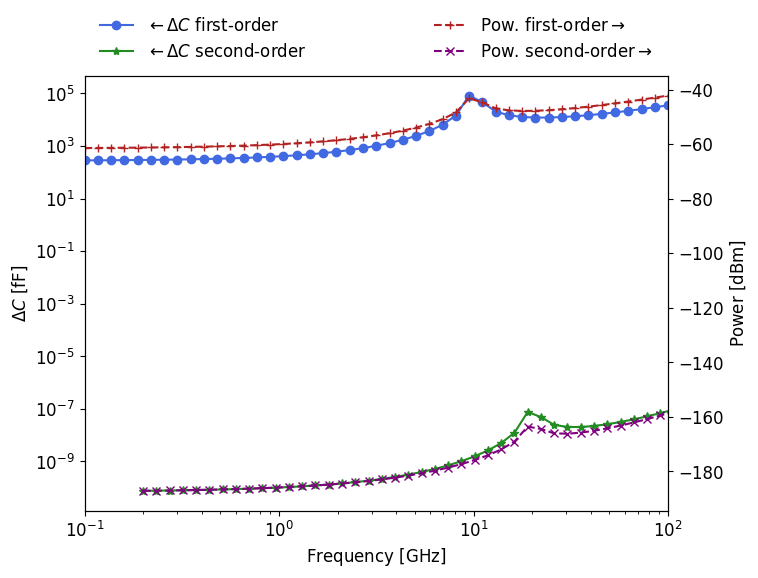

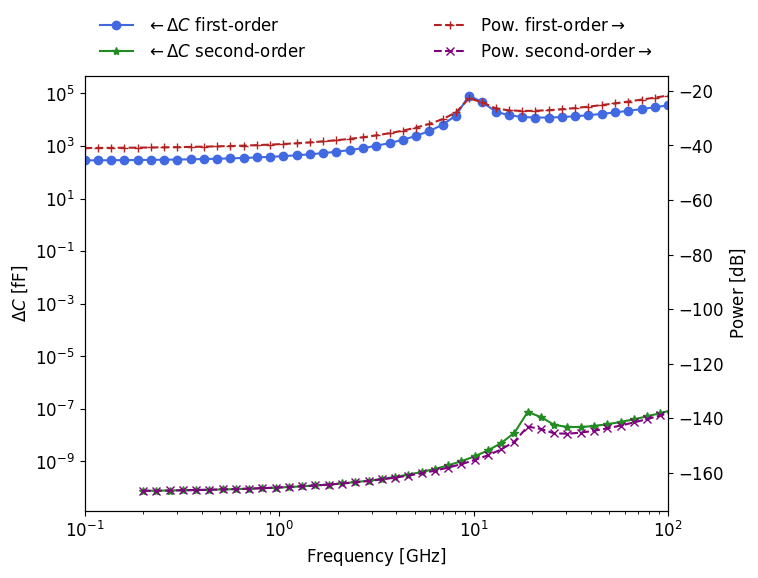

In [ ]:
##################### Signal response #########################
###############################################################
# Electric field
# Field perturbation, since in near field and such small particles, it is not scattering but the accumulated field in the particles (field distortion)
EsignalVariationF=np.abs(Nbacteria*((PermettivityCellTx-PermettivityWaterTx)/(PermettivityCellTx+2.0*PermettivityWaterTx))*(AppliedVoltage/(2.0*MeasuringDistance))*(FirstOrderNonlinearityCoeff)) # The nonlinear coefficients already account for teh ratios of volume (ParticleDiameter**3/TotalVolume)
EsignalVariation2F=np.abs(Nbacteria*((PermettivityCellTx-PermettivityWaterTx)/(PermettivityCellTx+2.0*PermettivityWaterTx))*(AppliedVoltage/(2.0*MeasuringDistance))*(SecondOrderNonlinearityCoeff))# The nonlinear coefficients already account for teh ratios of volume (Vshellthickness/TotalVolume)

# Relation to capacitance change
# "Oscillator-Based Reactance Sensors With Injection Locking for High-Throughput Flow Cytometry Using Microwave Dielectric Spectroscopy"
DeltaCsignalVariationF=np.abs(4.0*np.pi*((ParticleDiameter)**3)*(EsignalVariationF**2/(AppliedVoltage**2))*(PermettivityWaterTx)*((PermettivityCellTx-PermettivityWaterTx)/(PermettivityCellTx+2.0*PermettivityWaterTx)))
DeltaCsignalVariation2F=np.abs(4.0*np.pi*((ParticleDiameter)**3)*(EsignalVariation2F**2/(AppliedVoltage**2))*(PermettivityWaterTx)*((PermettivityCellTx-PermettivityWaterTx)/(PermettivityCellTx+2.0*PermettivityWaterTx)))

DefaultFigSize=[6.4, 4.8]
plt.figure(figsize=(DefaultFigSize[0]/.85,DefaultFigSize[1]/.85))
line1,=plt.plot(FreqTx*1e-9,np.abs(DeltaCsignalVariationF)*1e15,'royalblue',linestyle='solid',marker='o')
line2,=plt.plot(FreqSHG*1e-9,np.abs(DeltaCsignalVariation2F)*1e15,'forestgreen',linestyle='solid',marker='*')
plt.ylabel('$\Delta C$ [$\mathrm{fF}$]',fontsize = 'large')
plt.xlabel('Frequency [$\mathrm{GHz}$]',fontsize = 'large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.yscale('log')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.twinx()
line3,=plt.plot(FreqTx*1e-9,10.0*np.log10(np.abs((0.5*Permetivity_0*EsignalVariationF**2.0))*1e3),'firebrick',linestyle='dashed',marker='+')#/WaveImpedanceEdet_0
line4,=plt.plot(FreqSHG*1e-9,10.0*np.log10(np.abs((0.5*Permetivity_0*EsignalVariation2F**2.0))*1e3),'purple',linestyle='dashed',marker='x')
plt.xlabel('Frequency [$\mathrm{GHz}$]',fontsize = 'large')
plt.ylabel('Power [$\mathrm{dBm}$]',fontsize = 'large')
plt.yticks(fontsize='large')
plt.xscale('log')
plt.xlim([1e-1,1e2])
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.legend((line1,line2,line3,line4,line5,line6), (r'$\leftarrow \Delta C$'+' first-order',r'$\leftarrow \Delta C$'+' second-order','Pow. first-order'+r'$\rightarrow$', 'Pow. second-order'+r'$\rightarrow$'),bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=2, fontsize = 'large',shadow = False, fancybox = False, frameon = False)
plt.savefig( 'FigCapScat1st2ndOrder.png', format = 'png', dpi = 600 )
plt.show()

# With respect the illumination power
DefaultFigSize=[6.4, 4.8]
plt.figure(figsize=(DefaultFigSize[0]/.85,DefaultFigSize[1]/.85))
line1,=plt.plot(FreqTx*1e-9,np.abs(DeltaCsignalVariationF)*1e15,'royalblue',linestyle='solid',marker='o')
line2,=plt.plot(FreqSHG*1e-9,np.abs(DeltaCsignalVariation2F)*1e15,'forestgreen',linestyle='solid',marker='*')
plt.ylabel('$\Delta C$ [$\mathrm{fF}$]',fontsize = 'large')
plt.xlabel('Frequency [$\mathrm{GHz}$]',fontsize = 'large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.yscale('log')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.twinx()
line3,=plt.plot(FreqTx*1e-9,10.0*np.log10(np.abs((0.5*Permetivity_0*EsignalVariationF**2.0))*1e3)-10.0*np.log10((0.5*Permetivity_0*((AppliedVoltage/(2.0*MeasuringDistance))**2.0))*1e3),'firebrick',linestyle='dashed',marker='+')
line4,=plt.plot(FreqSHG*1e-9,10.0*np.log10(np.abs((0.5*Permetivity_0*EsignalVariation2F**2.0))*1e3)-10.0*np.log10((0.5*Permetivity_0*((AppliedVoltage/(2.0*MeasuringDistance))**2.0))*1e3),'purple',linestyle='dashed',marker='x')
plt.xlabel('Frequency [$\mathrm{GHz}$]',fontsize = 'large')
plt.ylabel('Power [$\mathrm{dB}$]',fontsize = 'large')
plt.yticks(fontsize='large')
plt.xscale('log')
plt.xlim([1e-1,1e2])
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.legend((line1,line2,line3,line4,line5,line6), (r'$\leftarrow \Delta C$'+' first-order',r'$\leftarrow \Delta C$'+' second-order','Pow. first-order'+r'$\rightarrow$', 'Pow. second-order'+r'$\rightarrow$'),bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=2, fontsize = 'large',shadow = False, fancybox = False, frameon = False)
plt.savefig( 'FigCapScat1st2ndOrder.png', format = 'png', dpi = 600 )
plt.show()

1st analysis
NLratioPIMPs: 119.97543 dBc
DynamicRangePIMPs: 130.39752 dB
NLDynamicRangePIMPs: 10.422089 dB
2nd analysis
NLratioPIMPs: 169.34503 dBc
DynamicRangePIMPs: 229.74492 dB
NLDynamicRangePIMPs: 60.399887 dB
3rd analysis
NLratioPIMPs: 169.34973 dBc
DynamicRangePIMPs: 229.65952 dB
NLDynamicRangePIMPs: 60.309784 dB
4th analysis
NLratioPIMPs: 169.34952 dBc
DynamicRangePIMPs: 229.83354 dB
NLDynamicRangePIMPs: 60.484024 dB
5th analysis
NLratioPIMPs: 169.36179 dBc
DynamicRangePIMPs: 229.86537 dB
NLDynamicRangePIMPs: 60.503586 dB
6th analysis
NLratioPIMPs: 169.37291 dBc
DynamicRangePIMPs: 229.81462 dB
NLDynamicRangePIMPs: 60.44171 dB
7th analysis
NLratioPIMPs: 169.4 dBc
DynamicRangePIMPs: 229.89314 dB
NLDynamicRangePIMPs: 60.49315 dB
8th analysis
NLratioPIMPs: 119.97543 dBc
DynamicRangePIMPs: 130.39752 dB
NLDynamicRangePIMPs: 10.422081 dB
9th analysis
NLratioPIMPs: 120.09945 dBc
DynamicRangePIMPs: 130.55112 dB
NLDynamicRangePIMPs: 10.45166 dB
10th analysis
NLratioPIMPs: 120.030685 dBc
D

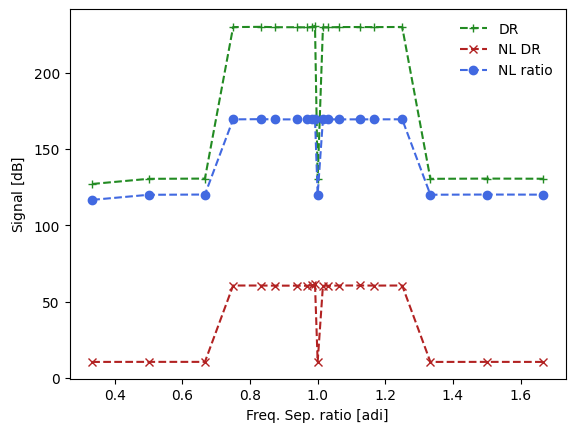

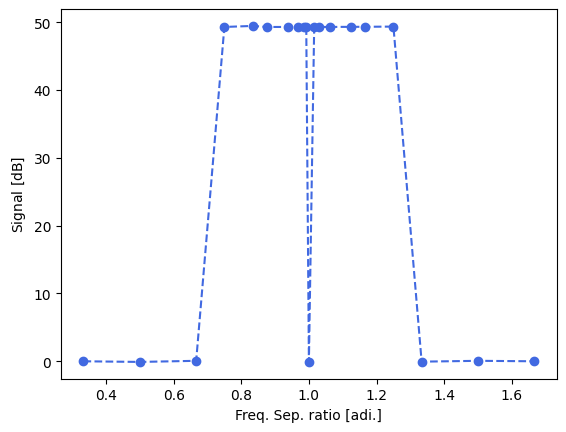

In [ ]:
###############################################################################
#### Intermodulation products intercept points
if (CalculatePIMPS):
  NumCyclesAux=NumCycles
  ### Apply PIMPS technique
  # One source of undesired interference is passive intermodulation. A commonly used approach to measuring passive IM is to inject two fixed frequency CW tones of 20W per tone into the device under test and measure the IM power levels generated.
  # https://www.castlemicrowave.com/assets/Uploads/PDF/PIM-Measurement-Techniques.pdf
  # https://en.wikipedia.org/wiki/Two-tone_testing
  # https://drive.google.com/file/d/1lix3TC7Jubi9Eb4IEcLgSFIiuY1ezEFW/view?usp=sharing
  
  def PIMPSfreqCalc(iIterAux,NumCyclesAuxAux,ParticleDiameterValAux,FreqsSeparationFactorAux,BiasPointPotentialAux,freqIllAux):
    if (freqIllAux>(freqIllAux*FreqsSeparationFactorAux)):
      Freq2Aux=freqIllAux
      Freq1Aux=freqIllAux*FreqsSeparationFactorAux
    else:
      Freq1Aux=freqIllAux
      Freq2Aux=freqIllAux*FreqsSeparationFactorAux
    freqsFFTaux = FreqTx
    iIterAuxFreq1=FindNearestIndex(freqsFFTaux,Freq1Aux)
    iIterAuxFreq2=FindNearestIndex(freqsFFTaux,Freq2Aux)
    timeDiscretized=np.linspace(0,NumCyclesAuxAux/Freq2Aux,int(NumCyclesAuxAux*CyclesSamplingFactor),endpoint=False) # number of points a power of 2

    TuckeyFilterAlpha=30.0 #If too much, distorts too much the levels of the signals 
    
    EffectiveIllutionField1=(AppliedVoltage/(2.0*MeasuringDistance))*np.cos(2*np.pi*Freq1Aux*timeDiscretized)
    EffectiveIllutionField1FFT = (1.0/len(EffectiveIllutionField1))*fftpack.fft(EffectiveIllutionField1)

    EffectiveIllutionField2=(AppliedVoltage/(2.0*MeasuringDistance))*np.cos(2*np.pi*Freq2Aux*timeDiscretized)
    EffectiveIllutionField2FFT = (1.0/len(EffectiveIllutionField2))*fftpack.fft(EffectiveIllutionField2)
    
    PIMPSfreqsFFTAux= fftpack.fftfreq(len(EffectiveIllutionField1)) * Freq2Aux * CyclesSamplingFactor

    Eaux=EffectiveIllutionField1+EffectiveIllutionField2
    EsignalVariation=((Nbacteria*(ParticleDiameterValAux**3/TotalVolume)*PermittivityMembraneCellTxAtLowGHz*Eaux+(TotalVolume/TotalVolume)*SecondOrderNonlinearCoeff*(Eaux**2)+(Nbacteria*Vshellthickness/TotalVolume)*ThirdOrderNonlinearCoeff*(BiasPointPotential/MembraneThickness)*(Eaux**2)+Nbacteria*(ParticleDiameterValAux**3/TotalVolume)*ThirdOrderNonlinearCoeff*(Eaux**3)+Nbacteria*(ParticleDiameterValAux**3/TotalVolume)*FourthOrderNonlinearCoeff*(Eaux**4))-((TotalVolume/TotalVolume)*PermettivityWaterTxAtLowGHz*Eaux))/(PermittivityMembraneCellTxAtLowGHz+2.0*PermettivityWaterTxAtLowGHz)
    EsignalVariationFFT = (1.0/len(EsignalVariation))*fftpack.fft(EsignalVariation*signal.kaiser(int(len(EsignalVariation)), beta=TuckeyFilterAlpha, sym=False))

    a_sField=1e0
    b_sField=1e-10
    c_sField=1e-18

    InterferenceSystem=1.0/np.sqrt(DetectionIlluminationSignalBlocking)*(a_sField*(Eaux)+b_sField*((Eaux)**2)-c_sField*((Eaux)**3))*signal.kaiser(int(len(Eaux)), beta=TuckeyFilterAlpha, sym=False)# sym : bool, optional; When True (default), generates a symmetric window, for use in filter design. When False, generates a periodic window, for use in spectral analysis.
    InterferenceSystemFFT = (1.0/len(InterferenceSystem))*fftpack.fft(InterferenceSystem)

    InterferenceSystemfreqsFFTAux= fftpack.fftfreq(len(InterferenceSystem)) * Freq2Aux * CyclesSamplingFactor

    return EsignalVariationFFT,InterferenceSystemFFT,PIMPSfreqsFFTAux,InterferenceSystemfreqsFFTAux
  
  DetectionIlluminationSignalBlocking=1e0 # Capacity to block illumination signal into the detection system in power
  PIMPSfreqCalcArrayFFT=np.zeros((len(FreqTx),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.complex64)
  InterferenceSystemArrayFFT=np.zeros((len(FreqTx),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.complex64)
  PIMPSfreqsFFTArray=np.zeros((len(FreqTx),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.float32)
  InterferenceSystemfreqsFFTArray=np.zeros((len(FreqTx),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.float32)

  NumAnalysis=20
  IntModProductSignalArray=np.zeros((NumAnalysis),dtype=np.float32)# 1st order signal
  NLPIMPsSignalArray=np.zeros((NumAnalysis),dtype=np.float32)# 2nd order signal
  IntModProductInterferenceArray=np.zeros((NumAnalysis),dtype=np.float32)# 2nd order interference
  FreqSeparationFactorArray=np.zeros((NumAnalysis),dtype=np.float32)
  PIMPSplotFreqActivated=False
  ###################################################
  # 1st analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0
    FreqSeparationFactorArray[0]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)

  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[1000:5000]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[1000:5000]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[0]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[0]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[1]])
  IntModProductInterferenceArray[0]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[1]])
  NLratioPIMPs=IntModProductSignalArray[0]-NLPIMPsSignalArray[0]
  DynamicRangePIMPs=IntModProductSignalArray[0]-IntModProductInterferenceArray[0]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[0]-IntModProductInterferenceArray[0]
  print('1st analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()

    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem((PIMPSfreqsFFTArray[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)]*1e-9,1e3*np.abs(((0.5*Permetivity_0*InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])**2),use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem((PIMPSfreqsFFTArray[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)]*1e-9,1e3*np.abs(((0.5*Permetivity_0*PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])**2),use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Frequency [$\mathrm{GHz}$]')
    plt.ylabel('Power [$\mathrm{mW}$]')
    plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.title('Freq. sep. factor '+str((FreqsSeparationFactor))+'. Dynamic range: '+"{:.2f}".format(DynamicRangePIMPs)+ ' dB \n NL signal: '+"{:.2f}".format(NLratioPIMPs)+ ' dBc. NL signal range: '+"{:.2f}".format(NLDynamicRangePIMPs)+ ' dB')
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()
  
  ###################################################3
  # 2nd analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0+1.0/64.0
    FreqSeparationFactorArray[1]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)

  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[1500:2500]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[1500:2500]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[1]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[1]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[1]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[1]-NLPIMPsSignalArray[1]
  DynamicRangePIMPs=IntModProductSignalArray[1]-IntModProductInterferenceArray[1]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[1]-IntModProductInterferenceArray[1]
  print('2nd analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()
  
  ###################################################3
  # 3rd analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0+1.0/32.0
    FreqSeparationFactorArray[2]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[1500:2500]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[1500:2500]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[2]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[2]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[2]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[2]-NLPIMPsSignalArray[2]
  DynamicRangePIMPs=IntModProductSignalArray[2]-IntModProductInterferenceArray[2]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[2]-IntModProductInterferenceArray[2]
  print('3rd analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()

  ###################################################3
  # 4th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0+1.0/16.0
    FreqSeparationFactorArray[3]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[1500:2500]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[1500:2500]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[3]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[3]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[3]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[3]-NLPIMPsSignalArray[3]
  DynamicRangePIMPs=IntModProductSignalArray[3]-IntModProductInterferenceArray[3]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[3]-IntModProductInterferenceArray[3]
  print('4th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()
  ###################################################3
  # 5th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0+1.0/8.0
    FreqSeparationFactorArray[4]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[1500:2500]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[1500:2500]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[4]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[4]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[4]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[4]-NLPIMPsSignalArray[4]
  DynamicRangePIMPs=IntModProductSignalArray[4]-IntModProductInterferenceArray[4]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[4]-IntModProductInterferenceArray[4]
  print('5th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()

  ###################################################3
  # 6th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0+1.0/6.0
    FreqSeparationFactorArray[5]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[1000:2500]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[1000:2500]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[5]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[5]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[5]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[5]-NLPIMPsSignalArray[5]
  DynamicRangePIMPs=IntModProductSignalArray[5]-IntModProductInterferenceArray[5]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[5]-IntModProductInterferenceArray[5]
  print('6th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()

  ###################################################3
  # 7th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0+1.0/4.0
    FreqSeparationFactorArray[6]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[1000:3000]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[1000:3000]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[6]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[6]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[6]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[6]-NLPIMPsSignalArray[6]
  DynamicRangePIMPs=IntModProductSignalArray[6]-IntModProductInterferenceArray[6]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[6]-IntModProductInterferenceArray[6]
  print('7th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()

  ###################################################3
  # 8th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0+1.0/3.0
    FreqSeparationFactorArray[7]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[500:3500]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[500:3500]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[7]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[7]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[7]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[7]-NLPIMPsSignalArray[7]
  DynamicRangePIMPs=IntModProductSignalArray[7]-IntModProductInterferenceArray[7]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[7]-IntModProductInterferenceArray[7]
  print('8th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()

  ###################################################3
  # 9th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0+1.0/2.0
    FreqSeparationFactorArray[8]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[250:3000]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[250:3000]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[8]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[8]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[8]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[8]-NLPIMPsSignalArray[8]
  DynamicRangePIMPs=IntModProductSignalArray[8]-IntModProductInterferenceArray[8]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[8]-IntModProductInterferenceArray[8]
  print('9th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()

  ###################################################3
  # 10th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0+1.0/1.5
    FreqSeparationFactorArray[9]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[250:3000]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[250:3000]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[9]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[9]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[9]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[9]-NLPIMPsSignalArray[9]
  DynamicRangePIMPs=IntModProductSignalArray[9]-IntModProductInterferenceArray[9]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[9]-IntModProductInterferenceArray[9]
  print('10th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()
  
  ###################################################
  # 11th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0-1.0/128.0
    FreqSeparationFactorArray[10]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)

  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[1850:2250]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[1850:2250]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[10]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[10]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[10]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[10]-NLPIMPsSignalArray[10]
  DynamicRangePIMPs=IntModProductSignalArray[10]-IntModProductInterferenceArray[10]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[10]-IntModProductInterferenceArray[10]
  print('11th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()

  ###################################################3
  # 12th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0-1.0/64.0
    FreqSeparationFactorArray[11]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)

  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[1850:2250]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[1850:2250]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[11]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[11]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[11]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[11]-NLPIMPsSignalArray[11]
  DynamicRangePIMPs=IntModProductSignalArray[11]-IntModProductInterferenceArray[11]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[11]-IntModProductInterferenceArray[11]
  print('12th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()
  
  ###################################################3
  # 13th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0-1.0/32.0
    FreqSeparationFactorArray[12]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[1750:2250]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[1750:2250]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[12]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[12]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[12]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[12]-NLPIMPsSignalArray[12]
  DynamicRangePIMPs=IntModProductSignalArray[12]-IntModProductInterferenceArray[12]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[12]-IntModProductInterferenceArray[12]
  print('13th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()

  ###################################################3
  # 14th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0-1.0/16.0
    FreqSeparationFactorArray[13]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[1750:2250]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[1750:2250]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[13]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[13]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[13]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[13]-NLPIMPsSignalArray[13]
  DynamicRangePIMPs=IntModProductSignalArray[13]-IntModProductInterferenceArray[13]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[13]-IntModProductInterferenceArray[13]
  print('14th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()
  ###################################################3
  # 15th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0-1.0/8.0
    FreqSeparationFactorArray[14]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[1250:2750]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[1250:2750]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[14]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[14]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[14]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[14]-NLPIMPsSignalArray[14]
  DynamicRangePIMPs=IntModProductSignalArray[14]-IntModProductInterferenceArray[14]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[14]-IntModProductInterferenceArray[14]
  print('15th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()

  ###################################################3
  # 16th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0-1.0/6.0
    FreqSeparationFactorArray[15]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[1000:2750]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[1000:2750]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[15]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[15]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[15]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[15]-NLPIMPsSignalArray[15]
  DynamicRangePIMPs=IntModProductSignalArray[15]-IntModProductInterferenceArray[15]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[15]-IntModProductInterferenceArray[15]
  print('16th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()

  ###################################################3
  # 17th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0-1.0/4.0
    FreqSeparationFactorArray[16]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[750:3000]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[750:3000]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[16]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[16]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[16]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[16]-NLPIMPsSignalArray[16]
  DynamicRangePIMPs=IntModProductSignalArray[16]-IntModProductInterferenceArray[16]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[16]-IntModProductInterferenceArray[16]
  print('17th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()

  ###################################################3
  # 18th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0-1.0/3.0
    FreqSeparationFactorArray[17]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[500:3000]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[500:3000]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[17]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[17]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[17]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[17]-NLPIMPsSignalArray[17]
  DynamicRangePIMPs=IntModProductSignalArray[17]-IntModProductInterferenceArray[17]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[17]-IntModProductInterferenceArray[17]
  print('18th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()

  ###################################################3
  # 19th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0-1.0/2.0
    FreqSeparationFactorArray[18]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[0:3500]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[0:3500]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[18]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[18]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[18]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[18]-NLPIMPsSignalArray[18]
  DynamicRangePIMPs=IntModProductSignalArray[18]-IntModProductInterferenceArray[18]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[18]-IntModProductInterferenceArray[18]
  print('19th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()

  ###################################################3
  # 20th analysis
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0-1.0/1.5
    FreqSeparationFactorArray[19]=FreqsSeparationFactor
    BiasPointPotential=100e-3 # [V]
    [PIMPSfreqCalcArrayFFT[iIter],InterferenceSystemArrayFFT[iIter],PIMPSfreqsFFTArray[iIter],InterferenceSystemfreqsFFTArray[iIter]]=PIMPSfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqTx[iIter])
  
  WaveImpedancedet_0Aux=np.zeros((len(PIMPSfreqsFFTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,PIMPSfreqsFFTArray[int(len(PIMPSfreqsFFTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=1e9
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  PeakDistance=11
  PartSignalAnalyzePeaks=np.abs((PIMPSfreqCalcArrayFFT[iIterFreq1Plot])[0:int(len((PIMPSfreqsFFTArray[iIterFreq1Plot]))/2.0)])[0:3500]
  peaksIndexSignal=(np.asarray(LibsDetectPeaks.detect_peaks(np.copy(PartSignalAnalyzePeaks),mpd=int(PeakDistance),edge='both',kpsh=False))).astype(np.int)
  peaksMarkerSignal=np.zeros_like(peaksIndexSignal)
  peaksMarkerSignal=PartSignalAnalyzePeaks[peaksIndexSignal]

  PartSignalAnalyzePeaks=np.abs((InterferenceSystemArrayFFT[iIterFreq1Plot])[0:int(len((InterferenceSystemArrayFFT[iIterFreq1Plot]))/2.0)])[0:3500]
  peaksIndexInterference=peaksIndexSignal
  peaksMarkerInterference=np.zeros_like(peaksIndexInterference)
  peaksMarkerInterference=PartSignalAnalyzePeaks[peaksIndexInterference]

  IntModProductSignalArray[19]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[0]])
  NLPIMPsSignalArray[19]=20.0*np.log10(peaksMarkerSignal[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  IntModProductInterferenceArray[19]=20.0*np.log10(peaksMarkerInterference[(np.argsort(peaksMarkerSignal)[::-1])[2]])
  NLratioPIMPs=IntModProductSignalArray[19]-NLPIMPsSignalArray[19]
  DynamicRangePIMPs=IntModProductSignalArray[19]-IntModProductInterferenceArray[19]
  NLDynamicRangePIMPs=NLPIMPsSignalArray[19]-IntModProductInterferenceArray[19]
  print('20th analysis')
  print('NLratioPIMPs: '+str(NLratioPIMPs)+' dBc')
  print('DynamicRangePIMPs: '+str(DynamicRangePIMPs)+' dB')
  print('NLDynamicRangePIMPs: '+str(NLDynamicRangePIMPs)+' dB')

  if (PIMPSplotFreqActivated):
    plt.figure()
    markerline3, stemlines3, baseline3=plt.stem(peaksIndexInterference,peaksMarkerInterference,use_line_collection=True)
    markerline1, stemlines1, baseline1=plt.stem(peaksIndexSignal,peaksMarkerSignal,use_line_collection=True)
    plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
    plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
    plt.setp(baseline1, color = 'white',linestyle='-')
    plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
    plt.setp(markerline3, color='royalblue',marker='+',markersize = 9)
    plt.setp(baseline3, color = 'white',linestyle='-')
    plt.xlabel('Point')
    plt.ylabel('Power [$\mathrm{mW}$]')
    #plt.xlim([Freq1Plot*1e-9-0.5*FreqsSeparationFactor,Freq1Plot*1e-9+2.5*FreqsSeparationFactor])
    plt.yscale('log')
    plt.legend((markerline1,markerline3), (str((Freq1Plot*1e-9))+' $\mathrm{GHz}$','Int. '+str((Freq1Plot*1e-9))+' $\mathrm{GHz}$'),loc='best',shadow = False, fancybox = False, frameon = False)# 'best'
    plt.savefig( 'FigTheoreticalPIMPSsep1comma25.png', format = 'png', dpi = 600 )
    plt.show()
  ##############################################################################
  
  # PIMPS study
  NLratioPIMPsArray=np.zeros((NumAnalysis),dtype=np.float32)
  DynamicRangePIMPsArray=np.zeros((NumAnalysis),dtype=np.float32)
  NLDynamicRangePIMPsArray=np.zeros((NumAnalysis),dtype=np.float32)

  IndexReOrder=np.argsort(FreqSeparationFactorArray)
  NLratioPIMPsArray=(IntModProductSignalArray-NLPIMPsSignalArray)[IndexReOrder]
  DynamicRangePIMPsArray=(IntModProductSignalArray-IntModProductInterferenceArray)[IndexReOrder]
  NLDynamicRangePIMPsArray=(NLPIMPsSignalArray-IntModProductInterferenceArray)[IndexReOrder]

  plt.figure()
  ax = plt.gca()
  line1,=plt.plot(FreqSeparationFactorArray[IndexReOrder],DynamicRangePIMPsArray,'forestgreen',linestyle='dashed',marker='+')
  line2,=plt.plot(FreqSeparationFactorArray[IndexReOrder],NLDynamicRangePIMPsArray,'firebrick',linestyle='dashed',marker='x')
  line3,=plt.plot(FreqSeparationFactorArray[IndexReOrder],NLratioPIMPsArray,'royalblue',linestyle='dashed',marker='o')
  plt.xlabel('Freq. Sep. ratio [adi]',fontsize=10)
  plt.ylabel('Signal [$\mathrm{dB}$]',fontsize=10)
  #plt.xscale('log')
  #plt.yscale('log')
  plt.setp(ax.get_xticklabels(),fontsize = 10)
  plt.setp(ax.get_yticklabels(),fontsize = 10)
  #plt.xlim([0.0,100.0])
  #plt.ylim([1e-20,1e0])
  plt.legend((line1,line2,line3,), ('DR','NL DR','NL ratio'), loc="best", shadow = False, fancybox = False, frameon = False,fontsize=10)# 'best'  
  plt.show()

  plt.figure()
  ax = plt.gca()
  #line1,=plt.plot(FreqSeparationFactorArray[IndexReOrder],DynamicRangePIMPsArray,'forestgreen',linestyle='dashed',marker='+')
  #line2,=plt.plot(FreqSeparationFactorArray[IndexReOrder],NLDynamicRangePIMPsArray,'firebrick',linestyle='dashed',marker='x')
  NLratioPIMPsArray[0]=NLratioPIMPsArray[-1]
  line1,=plt.plot(FreqSeparationFactorArray[IndexReOrder],NLratioPIMPsArray-NLratioPIMPsArray[-1],'royalblue',linestyle='dashed',marker='o')
  plt.xlabel('Freq. Sep. ratio [adi.]',fontsize=10)
  plt.ylabel('Signal [$\mathrm{dB}$]',fontsize=10)
  #plt.xscale('log')
  #plt.yscale('log')
  plt.setp(ax.get_xticklabels(),fontsize = 10)
  plt.setp(ax.get_yticklabels(),fontsize = 10)
  #plt.xlim([0.0,100.0])
  #plt.ylim([1e-20,1e0])
  #plt.legend((line1,line2,line3,), ('DR','NL DR','NL ratio'), loc="best", shadow = False, fancybox = False, frameon = False,fontsize=10)# 'best'  
  plt.show()

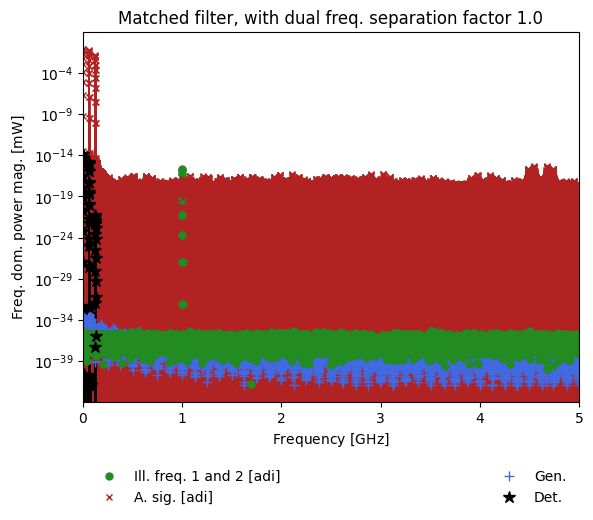

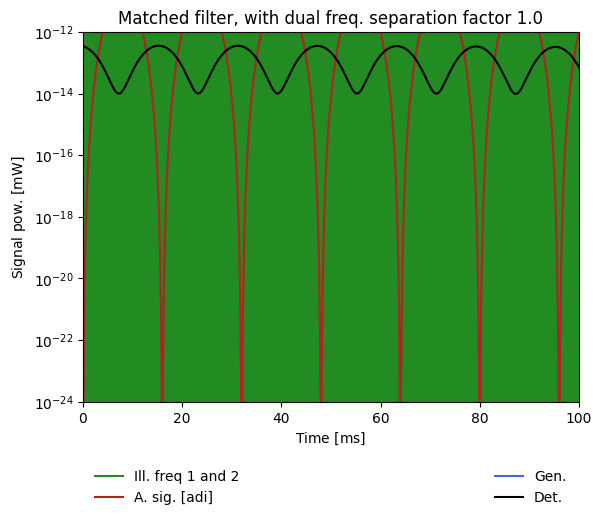

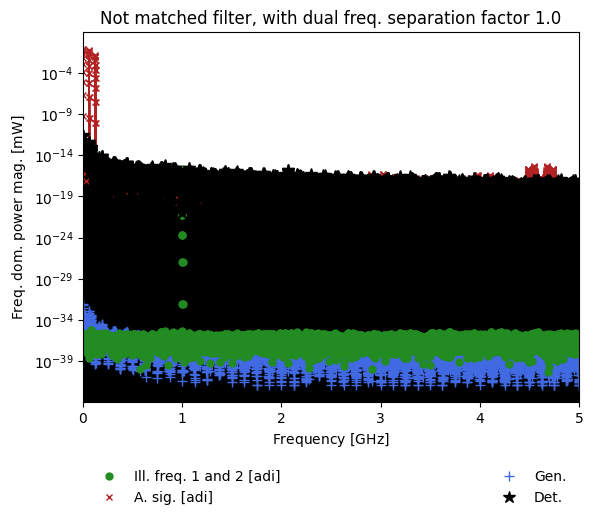

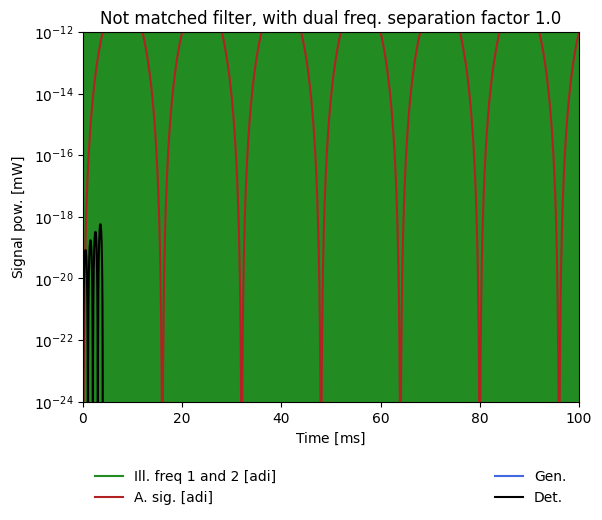

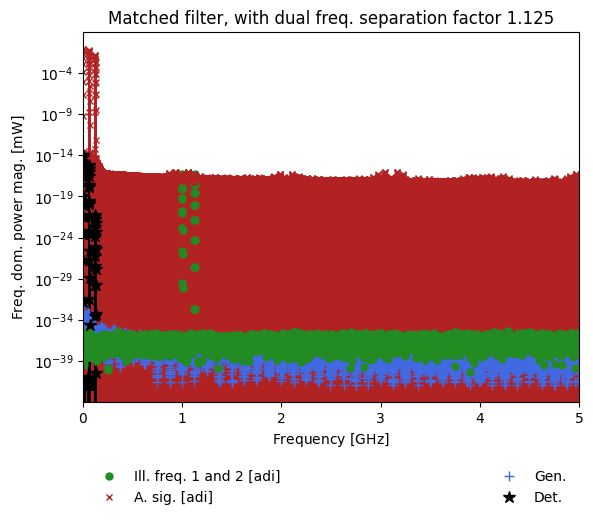

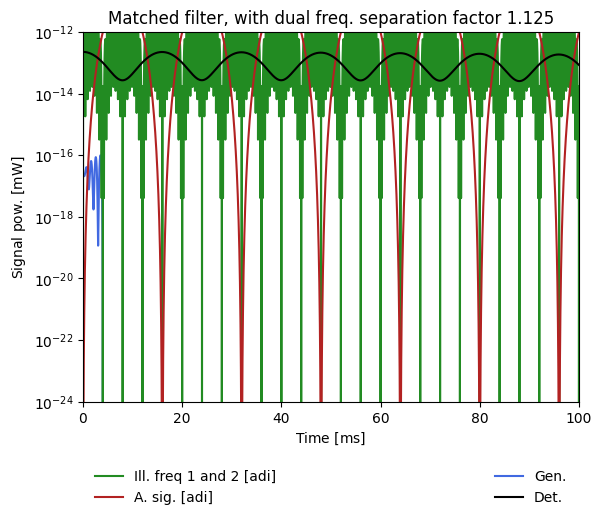

In [ ]:
#################################################################################
# Matched filter receiver
if (CalculateMatchedFilter):
  NumCyclesAux=NumCycles
  CyclesSamplingFactorAux=CyclesSamplingFactor
  NumCycles=2048
  CyclesSamplingFactor=64.0
  IlluminationSignalPotentialFTTArray=np.zeros((len(FreqTx),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.complex64)
  IlluminationSignalPotentialArray=np.zeros((len(FreqTx),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.complex64)
  timeDiscretizedArray=np.zeros((len(FreqTx),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.float32)
  MatchedSignalFTTArray=np.zeros((len(FreqTx),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.complex64)
  MatchedSignalArray=np.zeros((len(FreqTx),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.complex64)
  ActionPotentialSignatureArray=np.zeros((len(FreqTx),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.complex64)
  GeneratedSignalPotentialFFTArray=np.zeros((len(FreqTx),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.complex64)
  GeneratedSignalPotentialArray=np.zeros((len(FreqTx),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.complex64)
  DetectedSignalFFTArray=np.zeros((len(FreqTx),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.complex64)
  DetectedSignalArray=np.zeros((len(FreqTx),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.complex64)
  #print('len(freqsFFT): '+str(len(freqsFFT)))
  RecfreqsFFTArray=np.zeros((len(FreqTx),int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.float32)
  FactorFreqConversionLowAndHigh=1e6 # Frequency conversion to allow having both low frequencies and high frequencies in the computation given the limited number of points
  FreqTxAuxiliary=FreqTx
  FreqTx=(FreqTx/FreqTx[0])*FactorFreqConversionLowAndHigh
  def MatchedFilterRecfreqCalc(iIterAux,NumCyclesAuxAux,ParticleDiameterValAux,FreqsSeparationFactorAux,BiasPointPotentialAux,FreqSwitchingLightSlowAux,FreqSwitchingLightSlowDetuningFactorAux,freqIllAux,MatchedFilterReceiverAux):
    Freq1Aux=freqIllAux
    Freq2Aux=freqIllAux*FreqsSeparationFactorAux
    timeDiscretized=np.linspace(0.0,(NumCyclesAuxAux/Freq2Aux),int(NumCyclesAuxAux*CyclesSamplingFactor),endpoint=False) # number of points a power of 2
    RecfreqsFFTAux=fftpack.fftfreq(len(timeDiscretized)) * Freq2Aux * CyclesSamplingFactor
    TuckeyFilterAlpha=30.0 # If too much, distorts too much the levels of the signals
    NoiseVoltage=AppliedVoltage*1e-3
    VoltageNoise=np.random.normal(0.0,NoiseVoltage,len(timeDiscretized))
    ActionPotentialSignature=((np.cos(2*np.pi*FreqSwitchingLightSlowAux*timeDiscretized)-1.0)/2.0)**2
    ActionPotentialSignatureFFT=(1.0/len(ActionPotentialSignature))*fftpack.fft(ActionPotentialSignature*signal.kaiser(int(len(timeDiscretized)), beta=TuckeyFilterAlpha, sym=False))
    SinglePulseFunc=np.zeros_like(timeDiscretized)
    TimeStep=timeDiscretized[1]-timeDiscretized[0]    
    aIterAux=ActionPotentialSignature[int((-(1.0/(FreqSwitchingLightSlowAux))/TimeStep/2.0+len(timeDiscretized)/2.0)):int((len(timeDiscretized)/2.0))]
    SinglePulseFunc[0:int(len(aIterAux))]=ActionPotentialSignature[int(-(1.0/(FreqSwitchingLightSlowAux))/TimeStep/2.0+len(timeDiscretized)/2.0):int(len(timeDiscretized)/2.0)]
    
    IllField1=np.sin(2*np.pi*Freq1Aux*timeDiscretized)
    IllField2=np.sin(2*np.pi*Freq2Aux*timeDiscretized)
    IllFieldFFT=(1.0/len(IllField1))*fftpack.fft((IllField1+IllField2)*signal.kaiser(int(len(timeDiscretized)), beta=TuckeyFilterAlpha, sym=False))
    IlluminationSignalPotentialFreq1=VoltageNoise+Nbacteria*(AppliedVoltage)/(2.0*MeasuringDistance)*IllField1
    IlluminationSignalPotentialFreq2=VoltageNoise+Nbacteria*(AppliedVoltage)/(2.0*MeasuringDistance)*IllField2
    
    IlluminationSignalPotential=(IlluminationSignalPotentialFreq1+IlluminationSignalPotentialFreq2)
    IlluminationSignalPotentialFTT=(1.0/len(IlluminationSignalPotential))*fftpack.fft(IlluminationSignalPotential*signal.kaiser(int(len(timeDiscretized)), beta=TuckeyFilterAlpha, sym=False))
    
    MatchedSignal=ActionPotentialSignature#*SinglePulseFunc
    MatchedSignalFTT=(1.0/len(MatchedSignal))*fftpack.fft(MatchedSignal*signal.kaiser(int(len(timeDiscretized)), beta=TuckeyFilterAlpha, sym=False))

    GeneratedSignalPotential=VoltageNoise+(AppliedVoltage)/(2.0*MeasuringDistance)*((Nbacteria*(ParticleDiameterValAux**3/TotalVolume)*PermettivityCellTx[iIterAux]*(IllField1+IllField2)+(TotalVolume/TotalVolume)*SecondOrderNonlinearCoeff*((IllField1+IllField2)**2)+ActionPotentialSignature*(Nbacteria*Vshellthickness/TotalVolume)*ThirdOrderNonlinearCoeff*(BiasPointPotentialAux/MembraneThickness)*((IllField1+IllField2)**2)+(TotalVolume/TotalVolume)*ThirdOrderNonlinearCoeff*((IllField1+IllField2)**3))-(PermettivityWaterTx[iIterAux]*(IllField1+IllField2)))/(PermettivityCellTx[iIterAux]+2.0*PermettivityWaterTx[iIterAux])
    GeneratedSignalPotentialFFT=np.zeros((int(NumCyclesAux*CyclesSamplingFactor)),dtype=np.complex64)
    GeneratedSignalPotentialFFT=(1.0/len(GeneratedSignalPotential))*fftpack.fft(GeneratedSignalPotential*signal.kaiser(int(len(timeDiscretized)), beta=TuckeyFilterAlpha, sym=False))
    sizeLowPassFilter=int((0.5/(FreqSwitchingLightSlowAux))/TimeStep)
    GeneratedSignalPotentialDemodulated=GeneratedSignalPotential
    GeneratedSignalPotentialDemodulated=uniform_filter1d(np.real(GeneratedSignalPotential),size=sizeLowPassFilter)+1j*uniform_filter1d(np.imag(GeneratedSignalPotential),size=sizeLowPassFilter)
    #GeneratedSignalPotentialDemodulated=uniform_filter1d(np.real(GeneratedSignalPotential*(np.sin(2.0*np.pi*(2.0*Freq1Aux-Freq2Aux)*timeDiscretized))),size=sizeLowPassFilter)+1j*uniform_filter1d(np.imag(GeneratedSignalPotential*(np.sin(2.0*np.pi*(2.0*Freq1Aux-Freq2Aux)*timeDiscretized))),size=sizeLowPassFilter)
        
    GeneratedSignalPotentialDemodulatedFFT=(1.0/len(GeneratedSignalPotentialDemodulated))*fftpack.fft(GeneratedSignalPotentialDemodulated*signal.kaiser(int(len(timeDiscretized)), beta=TuckeyFilterAlpha, sym=False))

    if (MatchedFilterReceiverAux==True):
      DetectedSignalFFT=(len(IlluminationSignalPotentialFreq1)**2)*GeneratedSignalPotentialDemodulatedFFT*np.conj(MatchedSignalFTT)
      DetectedSignal=(len(IlluminationSignalPotentialFreq1))*fftpack.ifft(DetectedSignalFFT,len(IlluminationSignalPotentialFreq1))
    else:
      DetectedSignalFFT=(len(IlluminationSignalPotentialFreq1)**2)*GeneratedSignalPotentialDemodulatedFFT
      DetectedSignal=(len(IlluminationSignalPotentialFreq1))*fftpack.ifft(DetectedSignalFFT,len(IlluminationSignalPotentialFreq1))
    
    ActionPotentialSignature=ActionPotentialSignature/np.max(ActionPotentialSignature)*np.max(IlluminationSignalPotential)  

    return IlluminationSignalPotentialFTT,IlluminationSignalPotential,ActionPotentialSignature,MatchedSignalFTT,GeneratedSignalPotentialDemodulatedFFT,GeneratedSignalPotentialDemodulated,DetectedSignalFFT,DetectedSignal,timeDiscretized,RecfreqsFFTAux
  
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0
    BiasPointPotential=100e-3 # [V]
    FreqSwitchingLightSlow=FreqTx[iIter]/16.0 # [Hz] #So that is mathced to the number of points length. Otherwise more elaborated convolution is required
    MatchedFilterReceiver=True
    FreqSwitchingLightSlowDetuningFactor=1.0
    [IlluminationSignalPotentialFTTArray[iIter],IlluminationSignalPotentialArray[iIter],ActionPotentialSignatureArray[iIter],MatchedSignalFTTArray[iIter],GeneratedSignalPotentialFFTArray[iIter],GeneratedSignalPotentialArray[iIter],DetectedSignalFFTArray[iIter],DetectedSignalArray[iIter],timeDiscretizedArray[iIter],RecfreqsFFTArray[iIter]]=MatchedFilterRecfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqSwitchingLightSlow,FreqSwitchingLightSlowDetuningFactor,FreqTx[iIter],MatchedFilterReceiver)
  
  WaveImpedancedet_0Aux=np.zeros((len(IlluminationSignalPotentialFTTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,RecfreqsFFTArray[int(len(IlluminationSignalPotentialFTTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=FactorFreqConversionLowAndHigh
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  plt.figure()
  markerline3, stemlines3, baseline3=plt.stem((RecfreqsFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)]*(1.0/FactorFreqConversionLowAndHigh),1e3*np.abs(((0.5*Permetivity_0*GeneratedSignalPotentialFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)])**2),use_line_collection=True)
  markerline1, stemlines1, baseline1=plt.stem((RecfreqsFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)]*(1.0/FactorFreqConversionLowAndHigh),np.abs(((0.5*Permetivity_0*IlluminationSignalPotentialFTTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)])**2),use_line_collection=True)
  markerline2, stemlines2, baseline2=plt.stem((RecfreqsFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)]*(1.0/FactorFreqConversionLowAndHigh),np.abs(((MatchedSignalFTTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)])),use_line_collection=True)  
  markerline4, stemlines4, baseline4=plt.stem((RecfreqsFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)]*(1.0/FactorFreqConversionLowAndHigh),1e3*np.abs(((0.5*Permetivity_0*DetectedSignalFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)])**2),use_line_collection=True)
  plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
  plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
  plt.setp(baseline1, color = 'white',linestyle='-')
  plt.setp(stemlines2, color='firebrick',linewidth = 1.25)
  plt.setp(markerline2, color='firebrick',marker='x',markersize = 5)
  plt.setp(baseline2, color = 'white',linestyle='-')
  plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
  plt.setp(markerline3, color='royalblue',marker='+',markersize = 7)
  plt.setp(baseline3, color = 'white',linestyle='-')
  plt.setp(stemlines4, color='black',linewidth = 1.25)
  plt.setp(markerline4, color='black',marker='*',markersize = 9)
  plt.setp(baseline4, color = 'white',linestyle='-')
  plt.xlabel('Frequency [$\mathrm{GHz}$]')
  plt.ylabel('Freq. dom. power mag. [$\mathrm{mW}$]')
  #plt.xscale('log')
  plt.xlim([0.0,Freq1Plot/FactorFreqConversionLowAndHigh*5.0])
  #plt.ylim([1e-10,1e2])
  plt.yscale('log')
  plt.legend((markerline1,markerline2,markerline3,markerline4), ('Ill. freq. 1 and 2 [adi]', 'A. sig. [adi]', 'Gen.', 'Det.'),bbox_to_anchor=(0, -0.15, 1, 0), loc="upper left",mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False)# 'best'
  plt.title('Matched filter, with dual freq. separation factor '+str((FreqsSeparationFactor)))
  plt.show()
  
  plt.figure()
  ax = plt.gca()
  line3,=plt.plot(timeDiscretizedArray[iIterFreq1Plot]*FactorFreqConversionLowAndHigh,np.abs((0.5*Permetivity_0*GeneratedSignalPotentialArray[iIterFreq1Plot])**2)*1e3,'royalblue')
  line1,=plt.plot(timeDiscretizedArray[iIterFreq1Plot]*FactorFreqConversionLowAndHigh,np.abs((0.5*Permetivity_0*IlluminationSignalPotentialArray[iIterFreq1Plot])**2)*1e3,'forestgreen')
  line2,=plt.plot(timeDiscretizedArray[iIterFreq1Plot]*FactorFreqConversionLowAndHigh,np.abs((0.5*Permetivity_0*ActionPotentialSignatureArray[iIterFreq1Plot])**2)*1e3,'firebrick')  
  line4,=plt.plot(timeDiscretizedArray[iIterFreq1Plot]*FactorFreqConversionLowAndHigh,np.abs((0.5*Permetivity_0*DetectedSignalArray[iIterFreq1Plot])**2)*1e3,'black')
  plt.xlabel('Time [$\mathrm{ms}$]',fontsize=10)
  plt.ylabel('Signal pow. [$\mathrm{mW}$]',fontsize=10)
  #plt.xscale('log')
  plt.yscale('log')
  plt.setp(ax.get_xticklabels(),fontsize = 10)
  plt.setp(ax.get_yticklabels(),fontsize = 10)
  plt.xlim([0.0,100.0])
  plt.ylim([1e-24,1e-12])
  plt.legend((line1,line2,line3,line4), ('Ill. freq 1 and 2','A. sig. [adi]','Gen.','Det.'),bbox_to_anchor=(0, -0.15, 1, 0), loc="upper left",mode="expand", ncol=2, shadow = False, fancybox = False, frameon = False,fontsize=10)# 'best'
  plt.title('Matched filter, with dual freq. separation factor '+str((FreqsSeparationFactor)))
  plt.show()
  
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0
    BiasPointPotential=100e-3 # [V]
    FreqSwitchingLightSlow=FreqTx[iIter]/16.0 # [Hz] #Otherwise more elaborated convolution is required
    MatchedFilterReceiver=False
    FreqSwitchingLightSlowDetuningFactor=1.0
    [IlluminationSignalPotentialFTTArray[iIter],IlluminationSignalPotentialArray[iIter],MatchedSignalArray[iIter],MatchedSignalFTTArray[iIter],GeneratedSignalPotentialFFTArray[iIter],GeneratedSignalPotentialArray[iIter],DetectedSignalFFTArray[iIter],DetectedSignalArray[iIter],timeDiscretizedArray[iIter],RecfreqsFFTArray[iIter]]=MatchedFilterRecfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqSwitchingLightSlow,FreqSwitchingLightSlowDetuningFactor,FreqTx[iIter],MatchedFilterReceiver)
  
  WaveImpedancedet_0Aux=np.zeros((len(IlluminationSignalPotentialFTTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,RecfreqsFFTArray[int(len(IlluminationSignalPotentialFTTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=FactorFreqConversionLowAndHigh
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  plt.figure()
  markerline3, stemlines3, baseline3=plt.stem((RecfreqsFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)]*(1.0/FactorFreqConversionLowAndHigh),1e3*np.abs(((0.5*Permetivity_0*GeneratedSignalPotentialFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)])**2),use_line_collection=True)
  markerline1, stemlines1, baseline1=plt.stem((RecfreqsFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)]*(1.0/FactorFreqConversionLowAndHigh),np.abs(((0.5*Permetivity_0*IlluminationSignalPotentialFTTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)])**2),use_line_collection=True)
  markerline2, stemlines2, baseline2=plt.stem((RecfreqsFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)]*(1.0/FactorFreqConversionLowAndHigh),np.abs(((MatchedSignalFTTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)])),use_line_collection=True)
  markerline4, stemlines4, baseline4=plt.stem((RecfreqsFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)]*(1.0/FactorFreqConversionLowAndHigh),1e3*np.abs(((0.5*Permetivity_0*DetectedSignalFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)])**2),use_line_collection=True)
  plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
  plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
  plt.setp(baseline1, color = 'white',linestyle='-')
  plt.setp(stemlines2, color='firebrick',linewidth = 1.25)
  plt.setp(markerline2, color='firebrick',marker='x',markersize = 5)
  plt.setp(baseline2, color = 'white',linestyle='-')
  plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
  plt.setp(markerline3, color='royalblue',marker='+',markersize = 7)
  plt.setp(baseline3, color = 'white',linestyle='-')
  plt.setp(stemlines4, color='black',linewidth = 1.25)
  plt.setp(markerline4, color='black',marker='*',markersize = 9)
  plt.setp(baseline4, color = 'white',linestyle='-')
  plt.xlabel('Frequency [$\mathrm{GHz}$]')
  plt.ylabel('Freq. dom. power mag. [$\mathrm{mW}$]')
  #plt.xscale('log')
  plt.xlim([0.0,Freq1Plot/FactorFreqConversionLowAndHigh*5.0])
  #plt.ylim([1e-10,1e2])
  plt.yscale('log')
  plt.legend((markerline1,markerline2,markerline3,markerline4), ('Ill. freq. 1 and 2 [adi]', 'A. sig. [adi]', 'Gen.', 'Det.'),bbox_to_anchor=(0, -0.15, 1, 0), loc="upper left",mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False)# 'best'
  plt.title('Not matched filter, with dual freq. separation factor '+str((FreqsSeparationFactor)))
  plt.show()
  
  plt.figure()
  ax = plt.gca()
  line3,=plt.plot(timeDiscretizedArray[iIterFreq1Plot]*FactorFreqConversionLowAndHigh,np.abs((0.5*Permetivity_0*GeneratedSignalPotentialArray[iIterFreq1Plot])**2)*1e3,'royalblue')
  line1,=plt.plot(timeDiscretizedArray[iIterFreq1Plot]*FactorFreqConversionLowAndHigh,np.abs((0.5*Permetivity_0*IlluminationSignalPotentialArray[iIterFreq1Plot])**2)*1e3,'forestgreen')
  line2,=plt.plot(timeDiscretizedArray[iIterFreq1Plot]*FactorFreqConversionLowAndHigh,np.abs((0.5*Permetivity_0*ActionPotentialSignatureArray[iIterFreq1Plot])**2)*1e3,'firebrick')  
  line4,=plt.plot(timeDiscretizedArray[iIterFreq1Plot]*FactorFreqConversionLowAndHigh,np.abs((0.5*Permetivity_0*DetectedSignalArray[iIterFreq1Plot])**2)*1e3,'black')
  plt.xlabel('Time [$\mathrm{ms}$]',fontsize=10)
  plt.ylabel('Signal pow. [$\mathrm{mW}$]',fontsize=10)
  #plt.xscale('log')
  plt.yscale('log')
  plt.setp(ax.get_xticklabels(),fontsize = 10)
  plt.setp(ax.get_yticklabels(),fontsize = 10)
  plt.xlim([0.0,100.0])
  plt.ylim([1e-24,1e-12])
  plt.legend((line1,line2,line3,line4), ('Ill. freq 1 and 2 [adi]','A. sig. [adi]','Gen.','Det.'),bbox_to_anchor=(0, -0.15, 1, 0), loc="upper left",mode="expand", ncol=2, shadow = False, fancybox = False, frameon = False,fontsize=10)# 'best'
  plt.title('Not matched filter, with dual freq. separation factor '+str((FreqsSeparationFactor)))
  plt.show()
  
  for iIter in range(0,len(FreqTx),1):
    ParticleDiameterVal=1e-6
    FreqsSeparationFactor=1.0+1.0/8.0
    BiasPointPotential=100e-3 # [V]
    FreqSwitchingLightSlow=FreqTx[iIter]/16.0 # [Hz] #Otherwise more elaborated convolution is required
    MatchedFilterReceiver=True
    FreqSwitchingLightSlowDetuningFactor=1.0
    [IlluminationSignalPotentialFTTArray[iIter],IlluminationSignalPotentialArray[iIter],ActionPotentialSignatureArray[iIter],MatchedSignalFTTArray[iIter],GeneratedSignalPotentialFFTArray[iIter],GeneratedSignalPotentialArray[iIter],DetectedSignalFFTArray[iIter],DetectedSignalArray[iIter],timeDiscretizedArray[iIter],RecfreqsFFTArray[iIter]]=MatchedFilterRecfreqCalc(iIter,NumCyclesAux,ParticleDiameterVal,FreqsSeparationFactor,BiasPointPotential,FreqSwitchingLightSlow,FreqSwitchingLightSlowDetuningFactor,FreqTx[iIter],MatchedFilterReceiver)
  
  WaveImpedancedet_0Aux=np.zeros((len(IlluminationSignalPotentialFTTArray[0])),dtype=np.complex64)
  for iIter in range(0,len(WaveImpedancedet_0Aux),1):
    iIterAux=FindNearestIndex(FreqTx,RecfreqsFFTArray[int(len(IlluminationSignalPotentialFTTArray)/2)][iIter])
    WaveImpedancedet_0Aux[iIter]=WaveImpedanceMedium[iIterAux]

  Freq1Plot=FactorFreqConversionLowAndHigh
  iIterFreq1Plot=FindNearestIndex(FreqTx,Freq1Plot)
  
  plt.figure()
  markerline3, stemlines3, baseline3=plt.stem((RecfreqsFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)]*(1.0/FactorFreqConversionLowAndHigh),1e3*np.abs(((0.5*Permetivity_0*GeneratedSignalPotentialFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)])**2),use_line_collection=True)
  markerline1, stemlines1, baseline1=plt.stem((RecfreqsFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)]*(1.0/FactorFreqConversionLowAndHigh),np.abs(((0.5*Permetivity_0*IlluminationSignalPotentialFTTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)])**2),use_line_collection=True)
  markerline2, stemlines2, baseline2=plt.stem((RecfreqsFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)]*(1.0/FactorFreqConversionLowAndHigh),np.abs(((MatchedSignalFTTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)])),use_line_collection=True)
  markerline4, stemlines4, baseline4=plt.stem((RecfreqsFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)]*(1.0/FactorFreqConversionLowAndHigh),1e3*np.abs(((0.5*Permetivity_0*DetectedSignalFFTArray[iIterFreq1Plot])[0:int(len((RecfreqsFFTArray[iIterFreq1Plot]))/2.0)])**2),use_line_collection=True)
  plt.setp(stemlines1, color='forestgreen',linewidth = 1.25)
  plt.setp(markerline1, color='forestgreen',marker='o',markersize = 5)
  plt.setp(baseline1, color = 'white',linestyle='-')
  plt.setp(stemlines2, color='firebrick',linewidth = 1.25)
  plt.setp(markerline2, color='firebrick',marker='x',markersize = 5)
  plt.setp(baseline2, color = 'white',linestyle='-')
  plt.setp(stemlines3, color='royalblue',linewidth = 1.25)
  plt.setp(markerline3, color='royalblue',marker='+',markersize = 7)
  plt.setp(baseline3, color = 'white',linestyle='-')
  plt.setp(stemlines4, color='black',linewidth = 1.25)
  plt.setp(markerline4, color='black',marker='*',markersize = 9)
  plt.setp(baseline4, color = 'white',linestyle='-')
  plt.xlabel('Frequency [$\mathrm{GHz}$]')
  plt.ylabel('Freq. dom. power mag. [$\mathrm{mW}$]')
  #plt.xscale('log')
  plt.xlim([0.0,Freq1Plot/FactorFreqConversionLowAndHigh*5.0])
  #plt.ylim([1e-20,1e2])
  plt.yscale('log')
  plt.legend((markerline1,markerline2,markerline3,markerline4), ('Ill. freq. 1 and 2 [adi]', 'A. sig. [adi]', 'Gen.', 'Det.'),bbox_to_anchor=(0, -0.15, 1, 0), loc="upper left",mode="expand", ncol=2,shadow = False, fancybox = False, frameon = False)# 'best'
  plt.title('Matched filter, with dual freq. separation factor '+str((FreqsSeparationFactor)))
  plt.show()
  
  plt.figure()
  ax = plt.gca()
  line3,=plt.plot(timeDiscretizedArray[iIterFreq1Plot]*FactorFreqConversionLowAndHigh,np.abs((0.5*Permetivity_0*GeneratedSignalPotentialArray[iIterFreq1Plot])**2)*1e3,'royalblue')
  line1,=plt.plot(timeDiscretizedArray[iIterFreq1Plot]*FactorFreqConversionLowAndHigh,np.abs((0.5*Permetivity_0*IlluminationSignalPotentialArray[iIterFreq1Plot])**2)*1e3,'forestgreen')
  line2,=plt.plot(timeDiscretizedArray[iIterFreq1Plot]*FactorFreqConversionLowAndHigh,np.abs((0.5*Permetivity_0*ActionPotentialSignatureArray[iIterFreq1Plot])**2)*1e3,'firebrick')  
  line4,=plt.plot(timeDiscretizedArray[iIterFreq1Plot]*FactorFreqConversionLowAndHigh,np.abs((0.5*Permetivity_0*DetectedSignalArray[iIterFreq1Plot])**2)*1e3,'black')
  plt.xlabel('Time [$\mathrm{ms}$]',fontsize=10)
  plt.ylabel('Signal pow. [$\mathrm{mW}$]',fontsize=10)
  #plt.xscale('log')
  plt.yscale('log')
  plt.setp(ax.get_xticklabels(),fontsize = 10)
  plt.setp(ax.get_yticklabels(),fontsize = 10)
  plt.xlim([0.0,100.0])
  plt.ylim([1e-24,1e-12])
  plt.legend((line1,line2,line3,line4), ('Ill. freq 1 and 2 [adi]','A. sig. [adi]','Gen.','Det.'),bbox_to_anchor=(0, -0.15, 1, 0), loc="upper left",mode="expand", ncol=2, shadow = False, fancybox = False, frameon = False,fontsize=10)# 'best'
  plt.title('Matched filter, with dual freq. separation factor '+str((FreqsSeparationFactor)))
  plt.show()

  NumCycles=NumCyclesAux
  CyclesSamplingFactor=CyclesSamplingFactorAux
  FreqTx=FreqTxAuxiliary